# Labs Access Analysis: 03 Metropolitan Area Map Plot

## Setup

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
import json
pd.options.mode.chained_assignment = None
import branca.colormap as cmp
import os
import time
import folium
from matplotlib.patches import Patch
import warnings
warnings.filterwarnings('ignore') # ignore warnings

In [2]:
sns.set_context("poster")
sns.set_style("ticks")
matplotlib.rc('font', family='serif', serif='Fira Sans')

In [3]:
url_data_labs = "data/valid_labs.csv"
url_data_isochrones = "data/isochrones.json"

In [4]:
# Load data, json
with open(url_data_isochrones) as json_file:
    data = json.load(json_file)

In [5]:
# Load data, csv
labs = pd.read_csv(url_data_labs)

In [6]:
locations = {}
for i in data:
  locations[i['name']] = i['metadata']['query']['locations'][0]

### Map visualziation

In [7]:
m=folium.Map(location=[41.396721,2.1943200000000003])
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)

In [8]:
for loc in locations:
  folium.Marker(location=[locations[loc][1],locations[loc][0]],popup=loc,tooltip=loc).add_to(m)

In [9]:
m

organize the data

In [10]:
rows = []
for h in data:
  rows.append([h["name"], h["features"][0]["properties"]["total_pop"], h["features"][0]["properties"]["area"], h["features"][0]["properties"]["reachfactor"], h["features"][0]["geometry"]["coordinates"], []])

In [11]:
map_data = pd.DataFrame(rows, columns=['Name', 'total_pop', 'area', 'reachfactor','geometry', 'isochrone'])
map_data.head()

Name  total_pop        area  reachfactor  \
0                           3D Incubator    25847.0  1257375.85       0.2562   
1                   AKASHA Hub Barcelona    96774.0  4573263.53       0.9317   
2        Ateneu de Fabricació Ca L'Alier    93219.0  4526884.39       0.9222   
3  Ateneu de Fabricació Ciutat Meridiana    11587.0  1595247.01       0.3250   
4            Ateneu de Fabricació Gràcia    97329.0  4510074.18       0.9188   

                                            geometry isochrone  
0  [[[2.109858, 41.336682], [2.111475, 41.334295]...        []  
1  [[[2.178987, 41.413062], [2.179193, 41.408718]...        []  
2  [[[2.190682, 41.404717], [2.192169, 41.402302]...        []  
3  [[[2.162366, 41.467182], [2.162393, 41.466976]...        []  
4  [[[2.148282, 41.39726], [2.148285, 41.397202],...        []

create a flip isochrone cell for each lab

In [12]:
for ind in map_data.index:
     row_iso = []
     for coords in map_data['geometry'][ind][0]:
       row_iso.append([coords[1], coords[0], 900])
     map_data.at[ind, 'isochrone'] = row_iso

In [13]:
map_data.set_index('Name', inplace=True)
labs.set_index('Name', inplace=True)

add colums from the csv file (the labs) to the json file (the isochrones)

In [14]:
full_map_data = map_data.join(labs)

In [15]:
full_map_data

total_pop        area  \
Name                                                                        
3D Incubator                                          25847.0  1257375.85   
AKASHA Hub Barcelona                                  96774.0  4573263.53   
Ateneu de Fabricació Ca L'Alier                       93219.0  4526884.39   
Ateneu de Fabricació Ciutat Meridiana                 11587.0  1595247.01   
Ateneu de Fabricació Gràcia                           97329.0  4510074.18   
...                                                       ...         ...   
La Nau Vila Besòs                                     55802.0  2907897.11   
Casal del Barri del Clot Espai Antoni Miró Peri...    90377.0  4396516.69   
Banc de Recursos Mancomunats de Ciutat Vella          83347.0  4700917.48   
Vestuariteca                                          96662.0  4515345.33   
Fundació Banc de Recursos                             92136.0  4412564.07   

                                                    reachfactor  \
Name                                                              
3D Incubator                                             0.2562   
AKASHA Hub Barcelona                                     0.9317   
Ateneu de Fabricació Ca L'Alier                          0.9222   
Ateneu de Fabricació Ciutat Meridiana                    0.3250   
Ateneu de Fabricació Gràcia                              0.9188   
...                                                         ...   
La Nau Vila Besòs                                        0.5924   
Casal del Barri del Clot Espai Antoni Miró Peri...       0.8957   
Banc de Recursos Mancomunats de Ciutat Vella             0.9577   
Vestuariteca                                             0.9199   
Fundació Banc de Recursos                                0.8989   

                                                                                             geometry  \
Name                                                                                                    
3D Incubator                                        [[[2.109858, 41.336682], [2.111475, 41.334295]...   
AKASHA Hub Barcelona                                [[[2.178987, 41.413062], [2.179193, 41.408718]...   
Ateneu de Fabricació Ca L'Alier                     [[[2.190682, 41.404717], [2.192169, 41.402302]...   
Ateneu de Fabricació Ciutat Meridiana               [[[2.162366, 41.467182], [2.162393, 41.466976]...   
Ateneu de Fabricació Gràcia                         [[[2.148282, 41.39726], [2.148285, 41.397202],...   
...                                                                                               ...   
La Nau Vila Besòs                                   [[[2.187538, 41.433679], [2.187605, 41.433537]...   
Casal del Barri del Clot Espai Antoni Miró Peri...  [[[2.171504, 41.413339], [2.171956, 41.409664]...   
Banc de Recursos Mancomunats de Ciutat Vella        [[[2.156223, 41.376009], [2.156739, 41.37378],...   
Vestuariteca                                        [[[2.12138, 41.375467], [2.12229, 41.373113], ...   
Fundació Banc de Recursos                           [[[2.138134, 41.405098], [2.138139, 41.405062]...   

                                                                                            isochrone  \
Name                                                                                                    
3D Incubator                                        [[41.336682, 2.109858, 900], [41.334295, 2.111...   
AKASHA Hub Barcelona                                [[41.413062, 2.178987, 900], [41.408718, 2.179...   
Ateneu de Fabricació Ca L'Alier                     [[41.404717, 2.190682, 900], [41.402302, 2.192...   
Ateneu de Fabricació Ciutat Meridiana               [[41.467182, 2.162366, 900], [41.466976, 2.162...   
Ateneu de Fabricació Gràcia                         [[41.39726, 2.148282, 900], [41.397202, 2.1482...   
...                                                                          

Transform the areas in square km


In [16]:
map_data["area"] = map_data["area"] / 1000000.0

In [17]:
map_data["area"].head()

Name
3D Incubator                             1.257376
AKASHA Hub Barcelona                     4.573264
Ateneu de Fabricació Ca L'Alier          4.526884
Ateneu de Fabricació Ciutat Meridiana    1.595247
Ateneu de Fabricació Gràcia              4.510074
Name: area, dtype: float64

### Population reached

plot the data

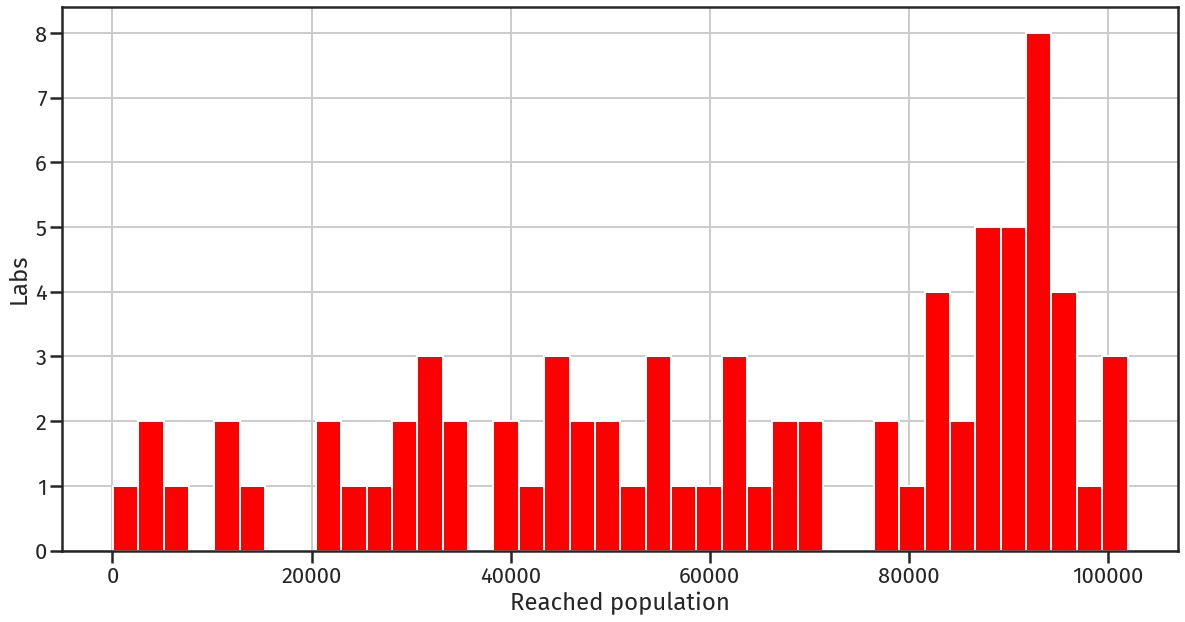

In [18]:
map_data["total_pop"].plot(kind="hist", bins=40, figsize=(20,10), color="r")
plt.xlabel('Reached population')
plt.ylabel('Labs')
plt.grid()
plt.savefig("svg" + os.sep + "metropolitan_area_labs_population_hist.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "metropolitan_area_labs_population_hist.png", dpi=300, bbox_inches="tight")

plot the data of the population reached by each lab

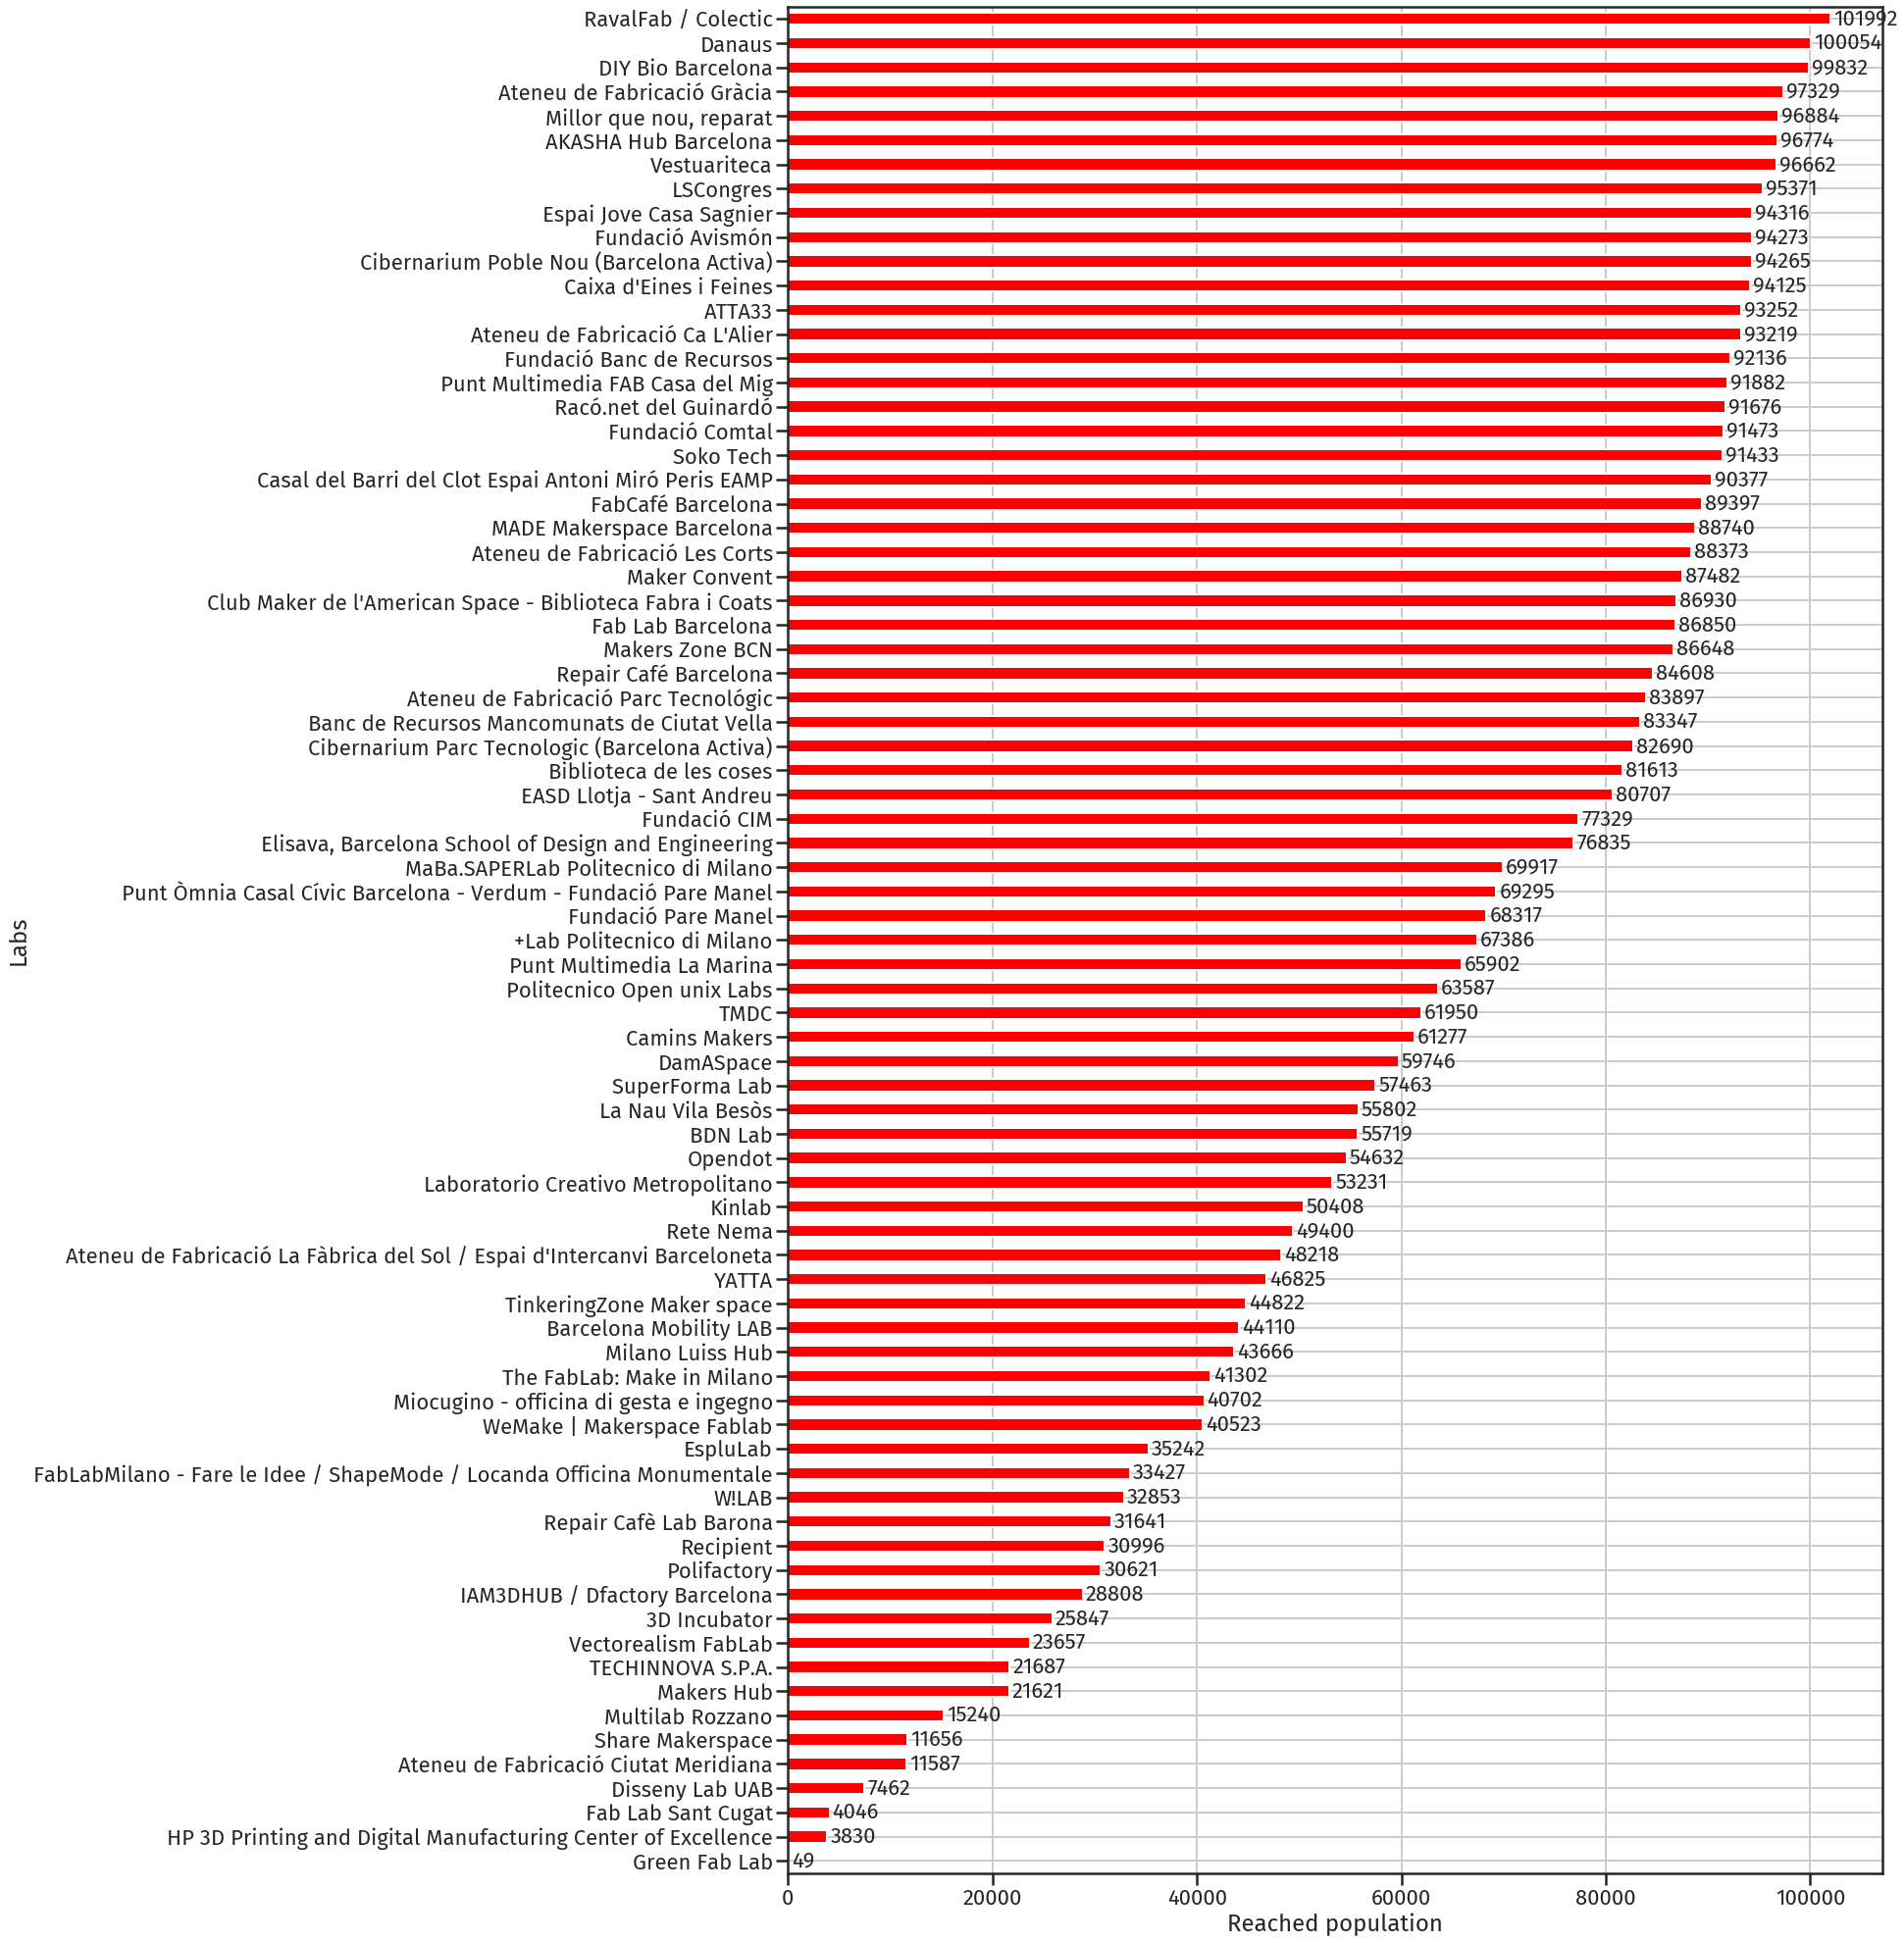

In [19]:
ax = map_data.sort_values(by=['total_pop'])['total_pop'].plot(kind="barh", figsize=(20,35), color="r")
ax.bar_label(ax.containers[0], fmt="%d", size=22, padding=3)
plt.xlabel('Reached population')
plt.ylabel('Labs')
plt.grid()
plt.savefig("svg" + os.sep + "metropolitan_area_labs_population_bar.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "metropolitan_area_labs_population_bar.png", dpi=300, bbox_inches="tight")

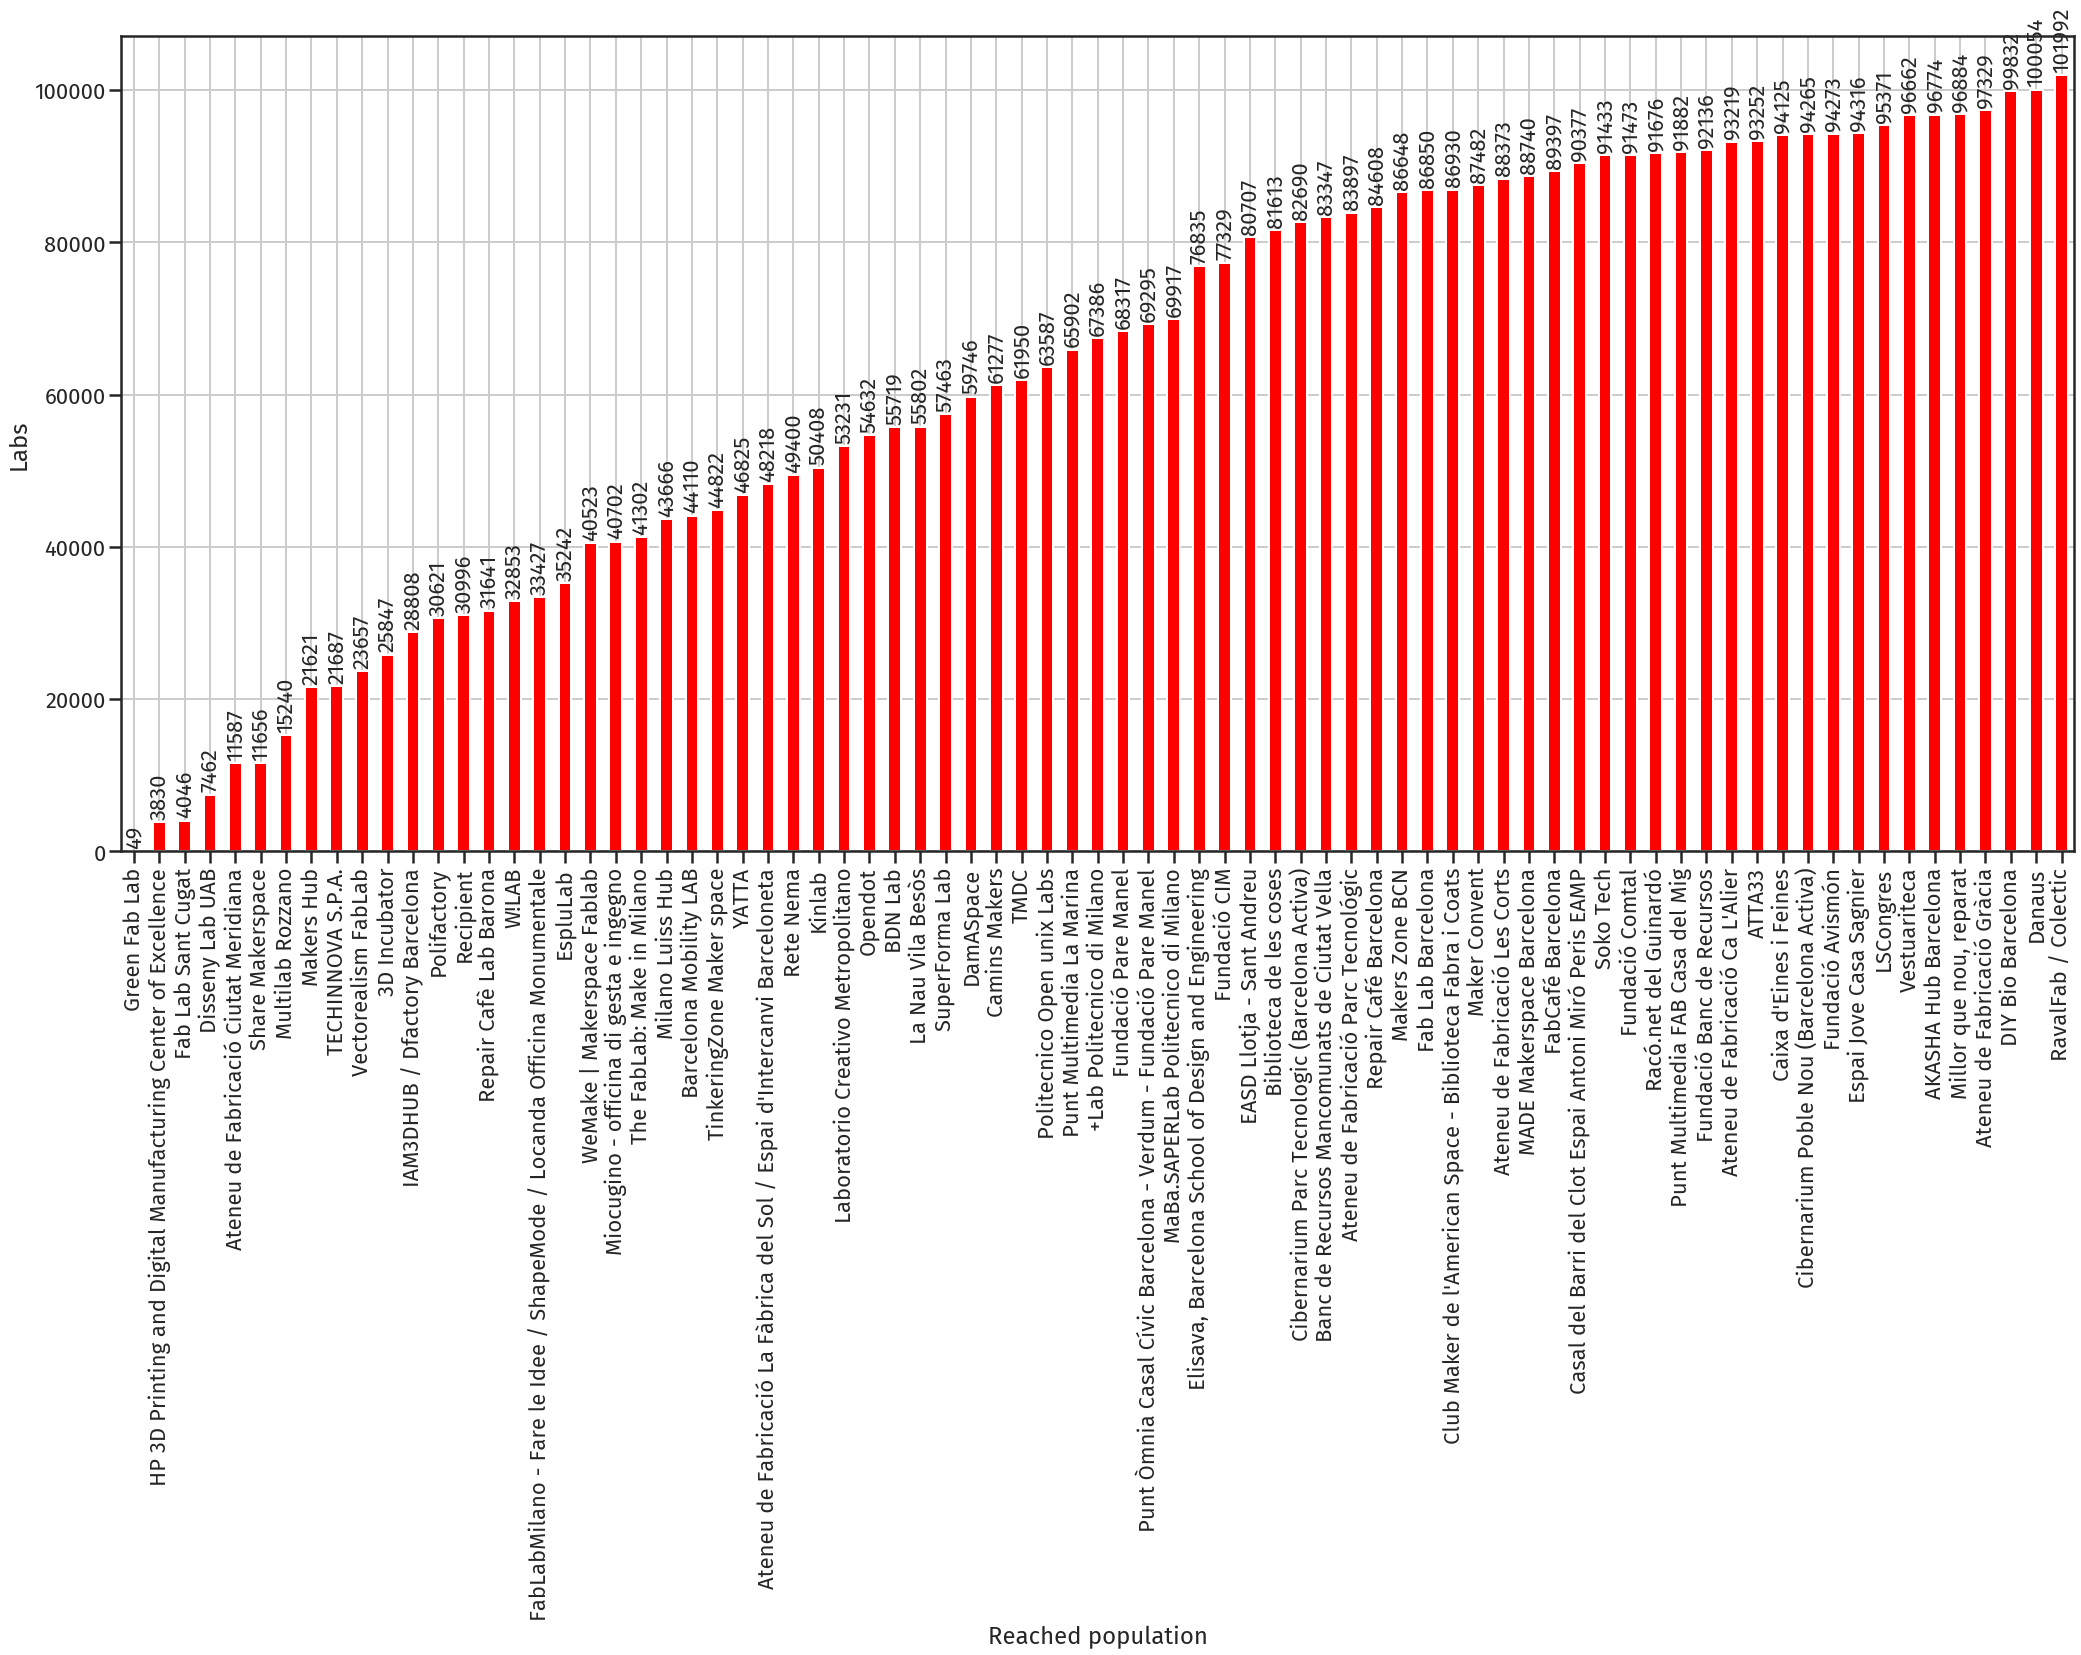

In [20]:
ax = map_data.sort_values(by=['total_pop'])['total_pop'].plot(kind="bar", figsize=(35,15), color="r")
ax.bar_label(ax.containers[0], fmt="%d", size=22, padding=3, rotation=90)
plt.xlabel('Reached population')
plt.ylabel('Labs')
plt.grid()
plt.savefig("svg" + os.sep + "metropolitan_area_labs_population_bar_vertical.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "metropolitan_area_labs_population_bar_vertical.png", dpi=300, bbox_inches="tight")

### Area reached

Plot the data

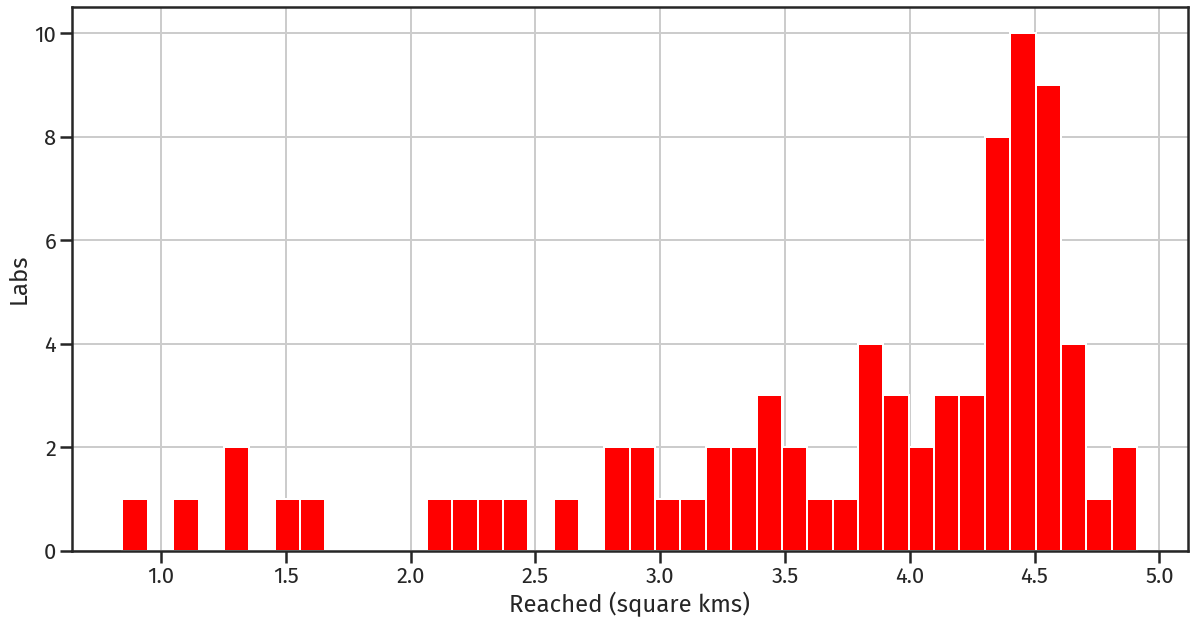

In [21]:
map_data["area"].plot(kind="hist", bins=40, figsize=(20,10), color="r")
plt.xlabel('Reached (square kms)')
plt.ylabel('Labs')
plt.grid()
plt.savefig("svg" + os.sep + "metropolitan_area_labs_area_hist.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "metropolitan_area_labs_area_hist.png", dpi=300, bbox_inches="tight")

Plot the data of the area reached by each lab

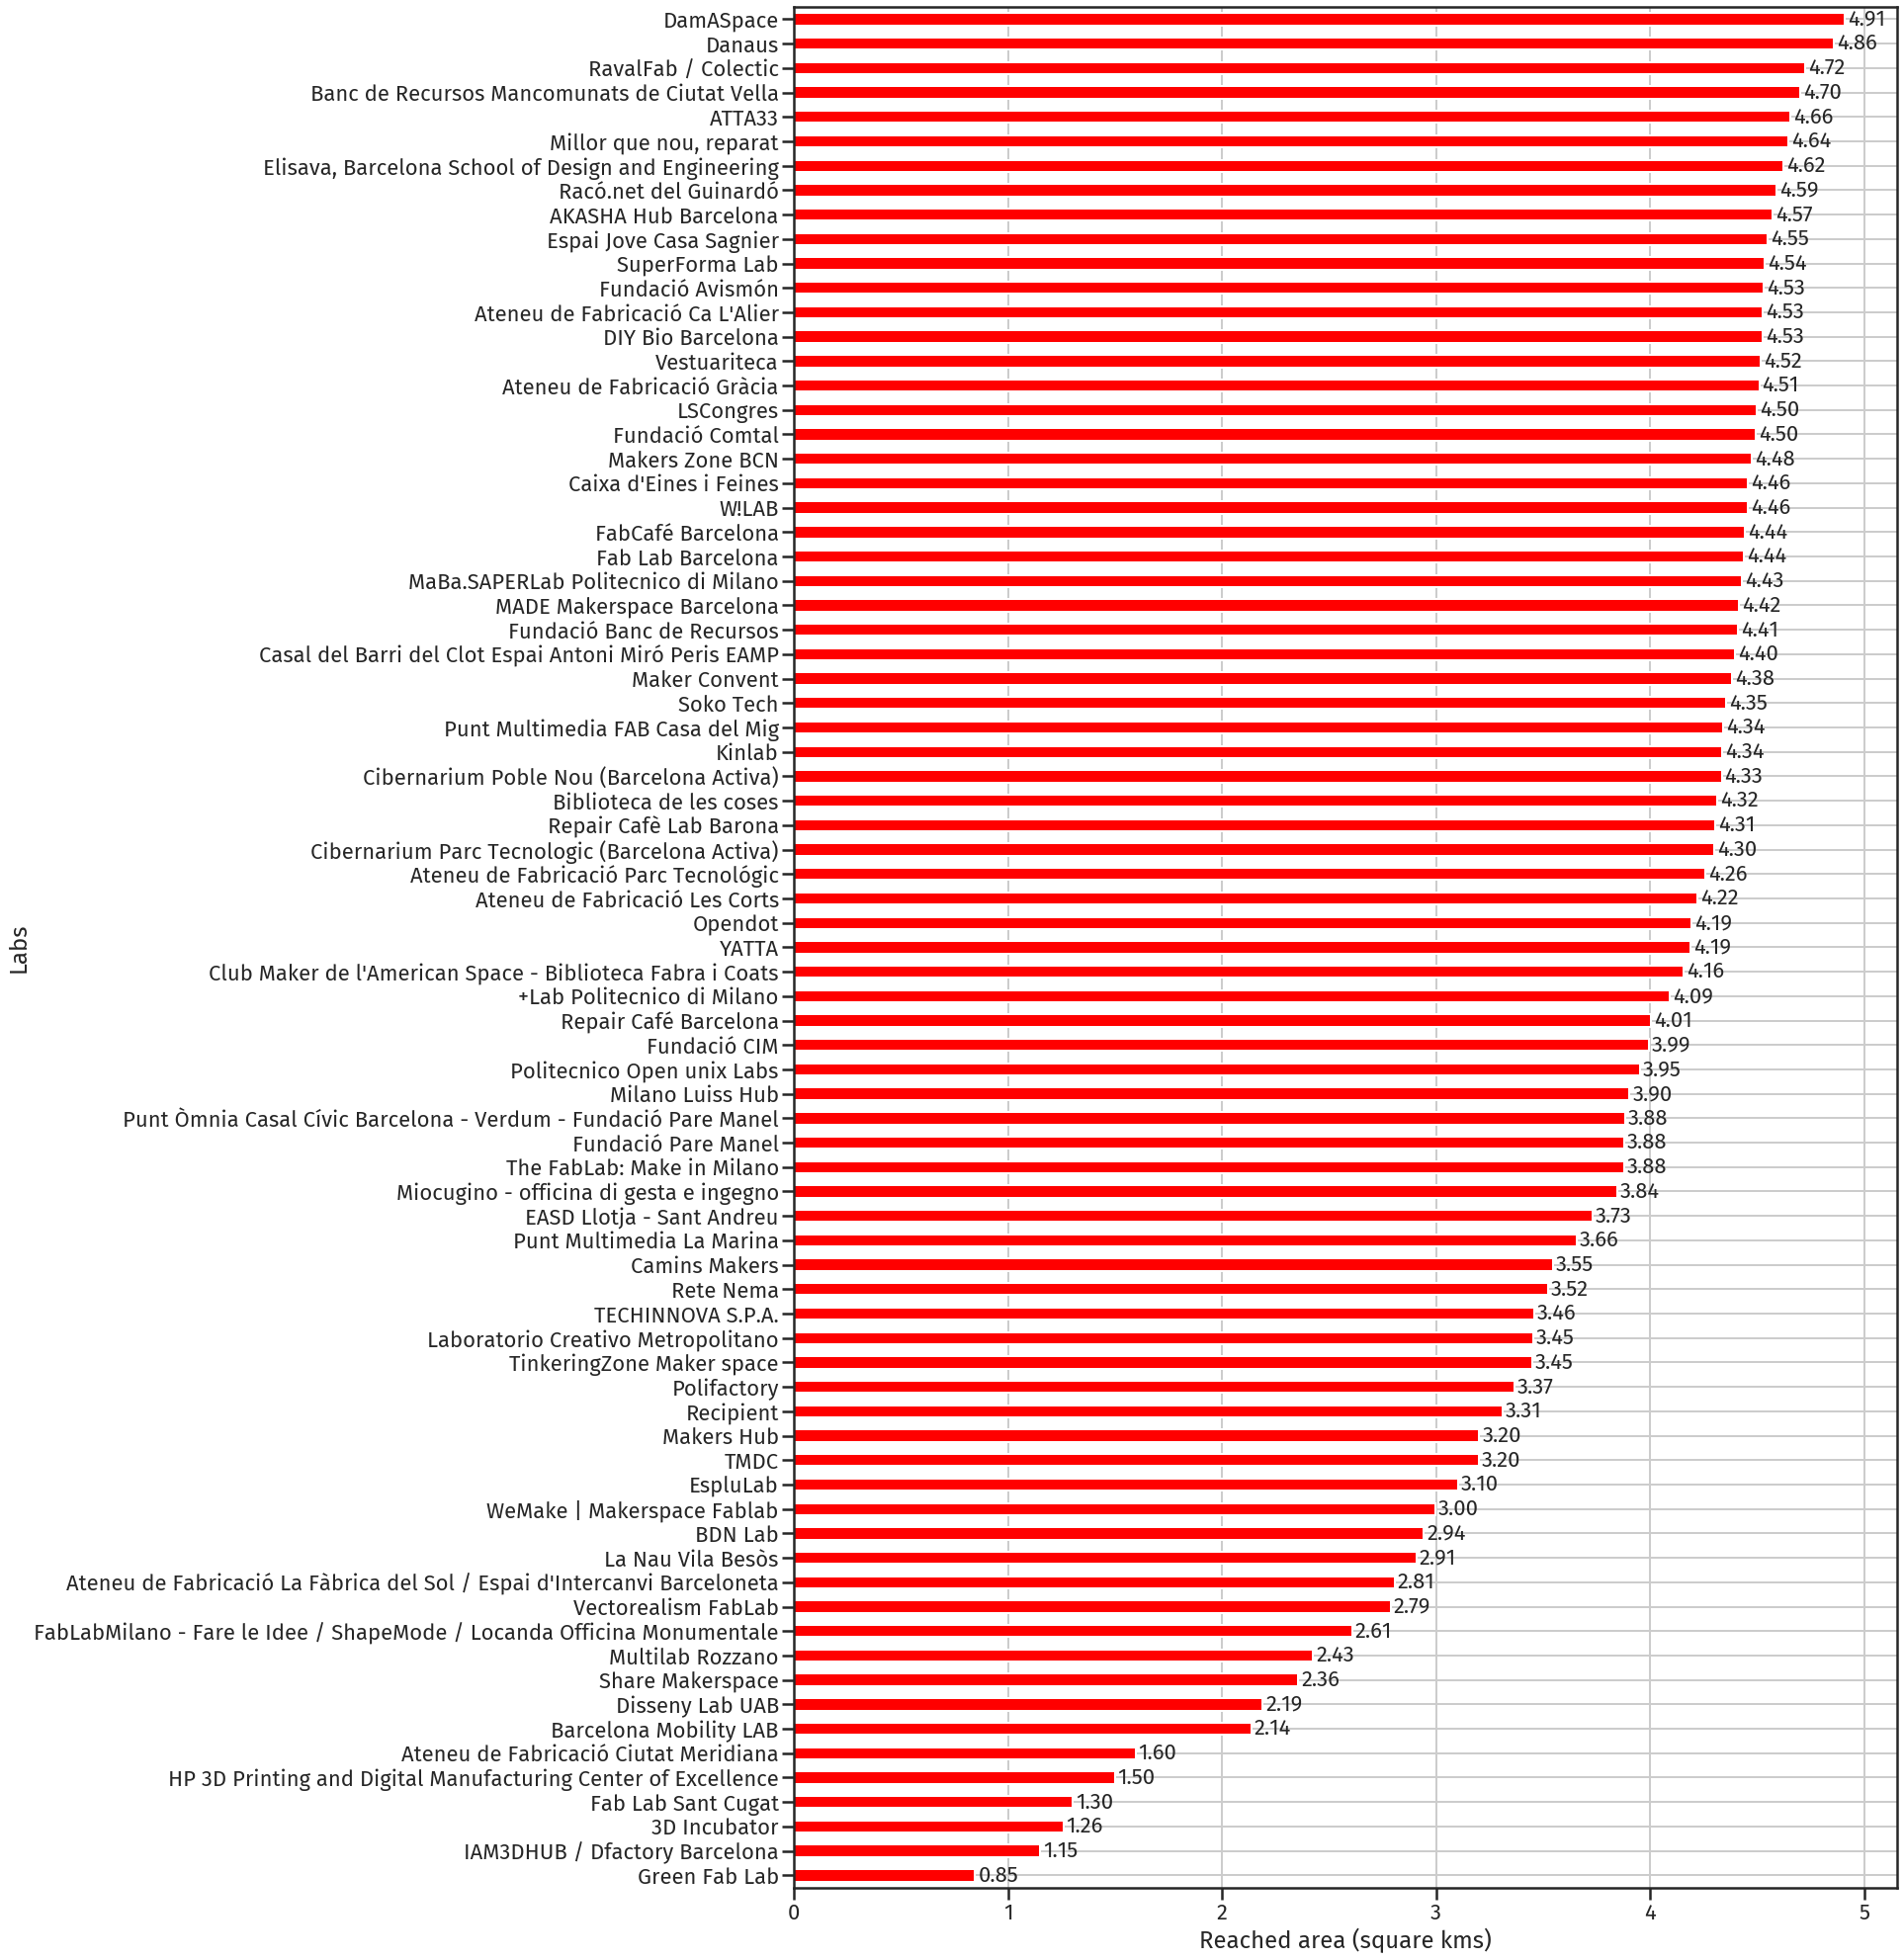

In [22]:
ax = map_data.sort_values(by=['area'])['area'].plot(kind="barh", figsize=(20,35), color="r")
ax.bar_label(ax.containers[0], fmt="%.2f", size=22, padding=3)
plt.xlabel('Reached area (square kms)')
plt.ylabel('Labs')
plt.grid()
plt.savefig("svg" + os.sep + "metropolitan_area_labs_area_bar.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "metropolitan_area_labs_area_bar.png", dpi=300, bbox_inches="tight")

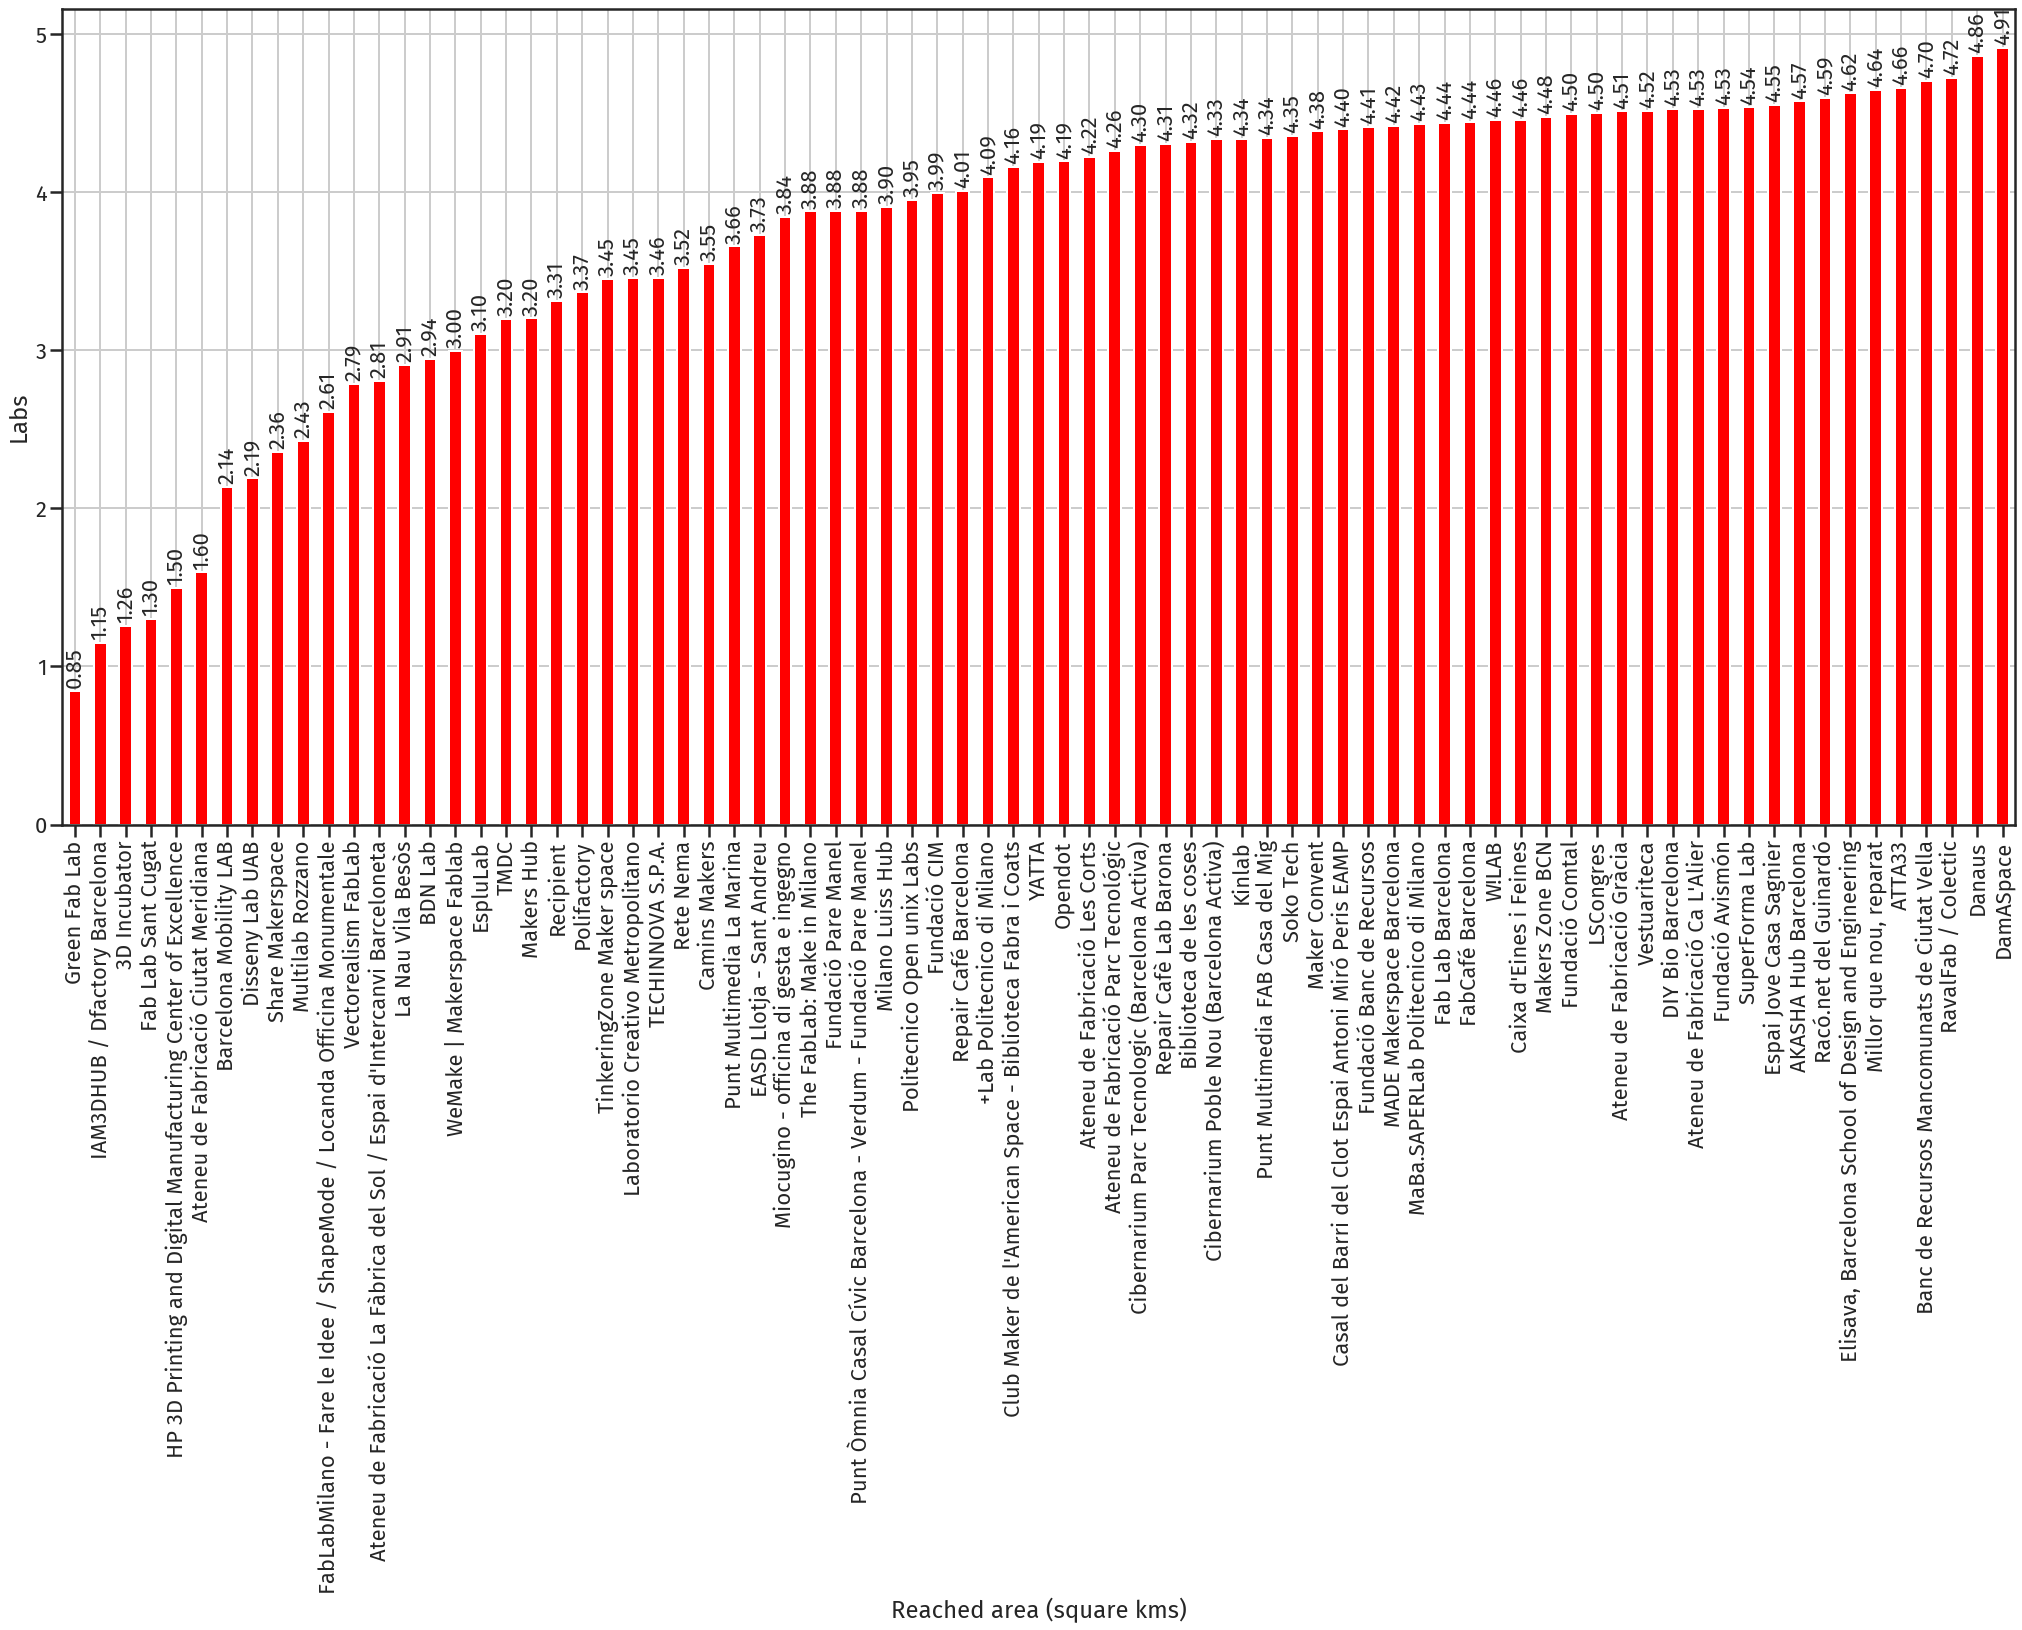

In [23]:
ax = map_data.sort_values(by=['area'])['area'].plot(kind="bar", figsize=(35,15), color="r")
ax.bar_label(ax.containers[0], fmt="%.2f", size=22, padding=3, rotation=90)
plt.xlabel('Reached area (square kms)')
plt.ylabel('Labs')
plt.grid()
plt.savefig("svg" + os.sep + "metropolitan_area_labs_area_bar_vertical.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "metropolitan_area_labs_area_bar_vertical.png", dpi=300, bbox_inches="tight")

### Reach Factor

Plot the data

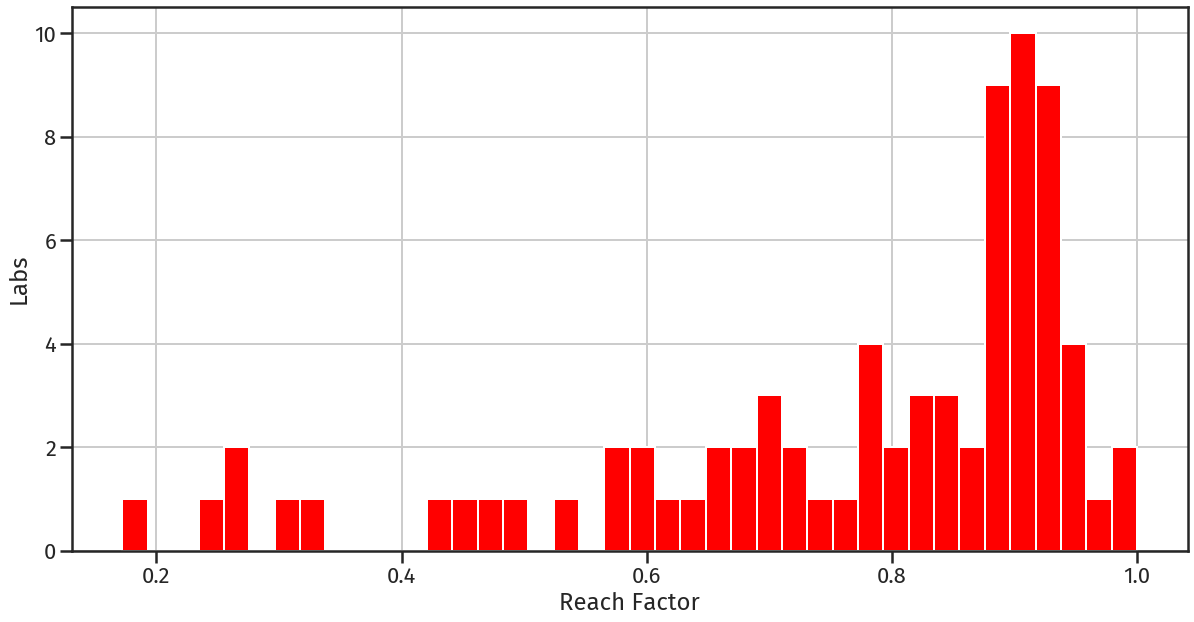

In [24]:
map_data["reachfactor"].plot(kind="hist", bins=40, figsize=(20,10), color="r")
plt.xlabel('Reach Factor')
plt.ylabel('Labs')
plt.grid()
plt.savefig("svg" + os.sep + "metropolitan_area_labs_reachfactor_hist.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "metropolitan_area_labs_reachfactor_hist.png", dpi=300, bbox_inches="tight")

plot the data of the reach factor for each lab

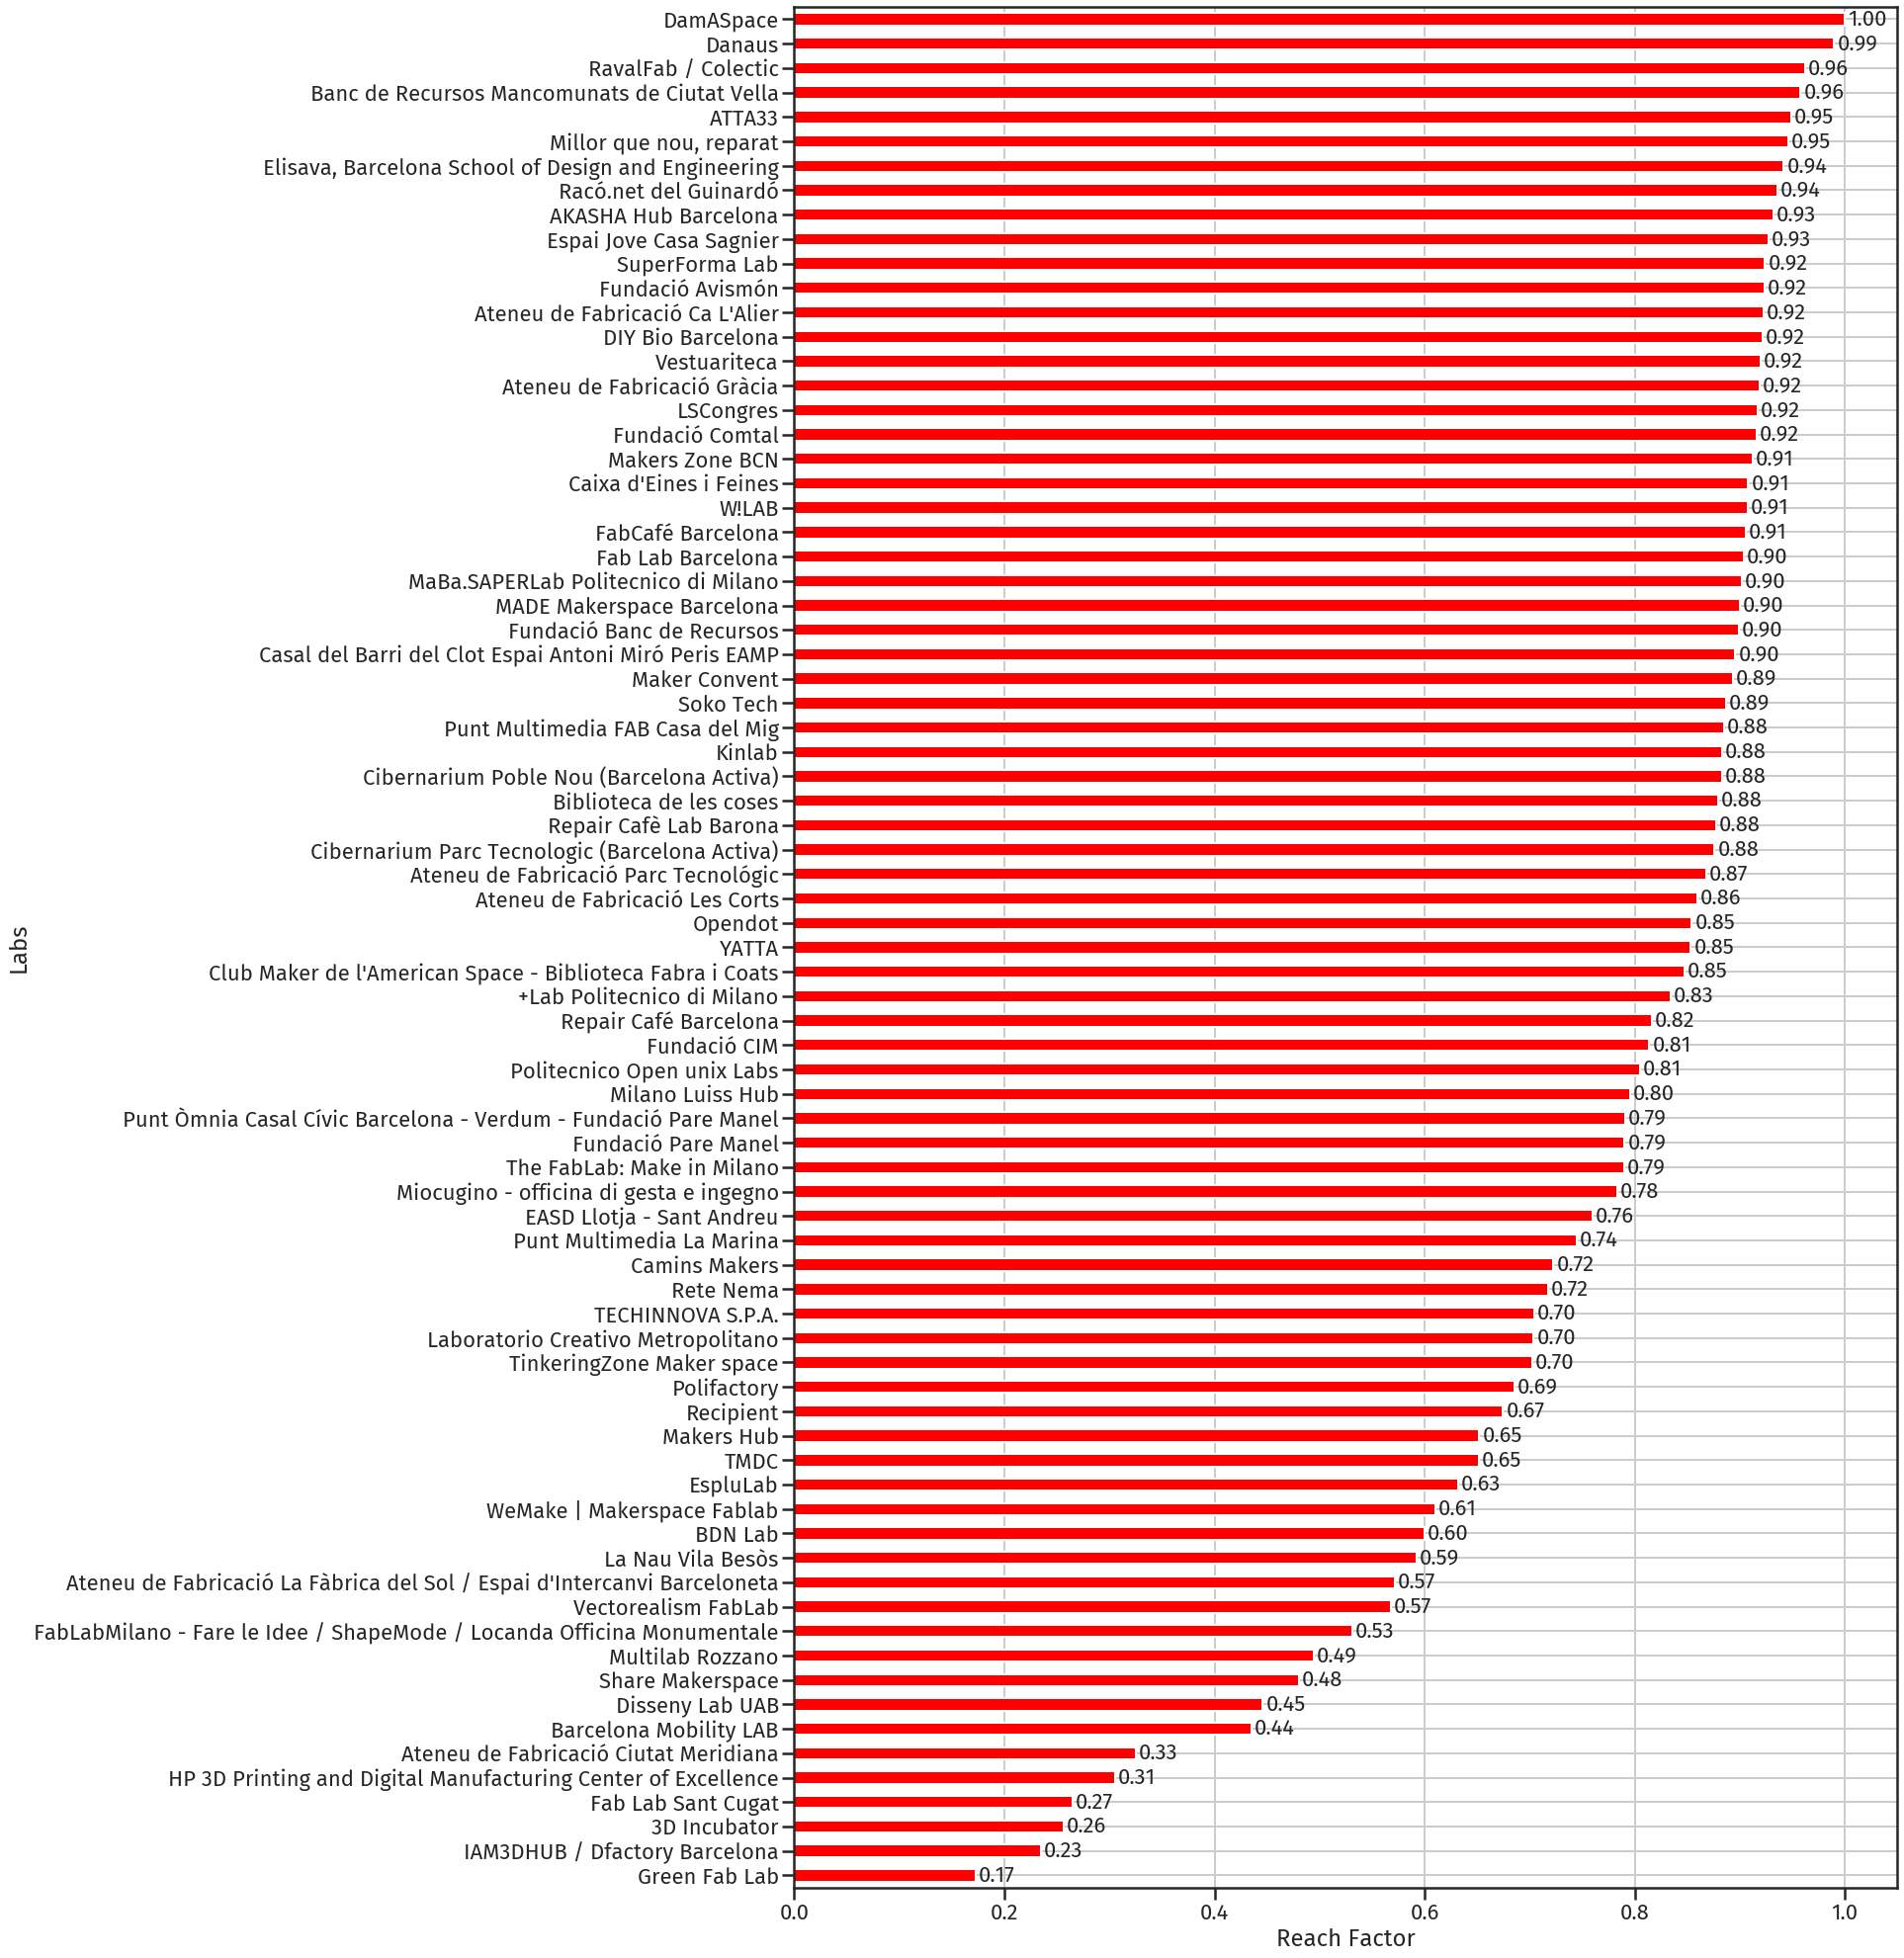

In [25]:
ax = map_data.sort_values(by=['reachfactor'])['reachfactor'].plot(kind="barh", figsize=(20,35), color="r")
ax.bar_label(ax.containers[0], fmt="%.2f", size=22, padding=3)
plt.xlabel('Reach Factor')
plt.ylabel('Labs')
plt.grid()
plt.savefig("svg" + os.sep + "metropolitan_area_labs_reachfactor_bar.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "metropolitan_area_labs_reachfactor_bar.png", dpi=300, bbox_inches="tight")

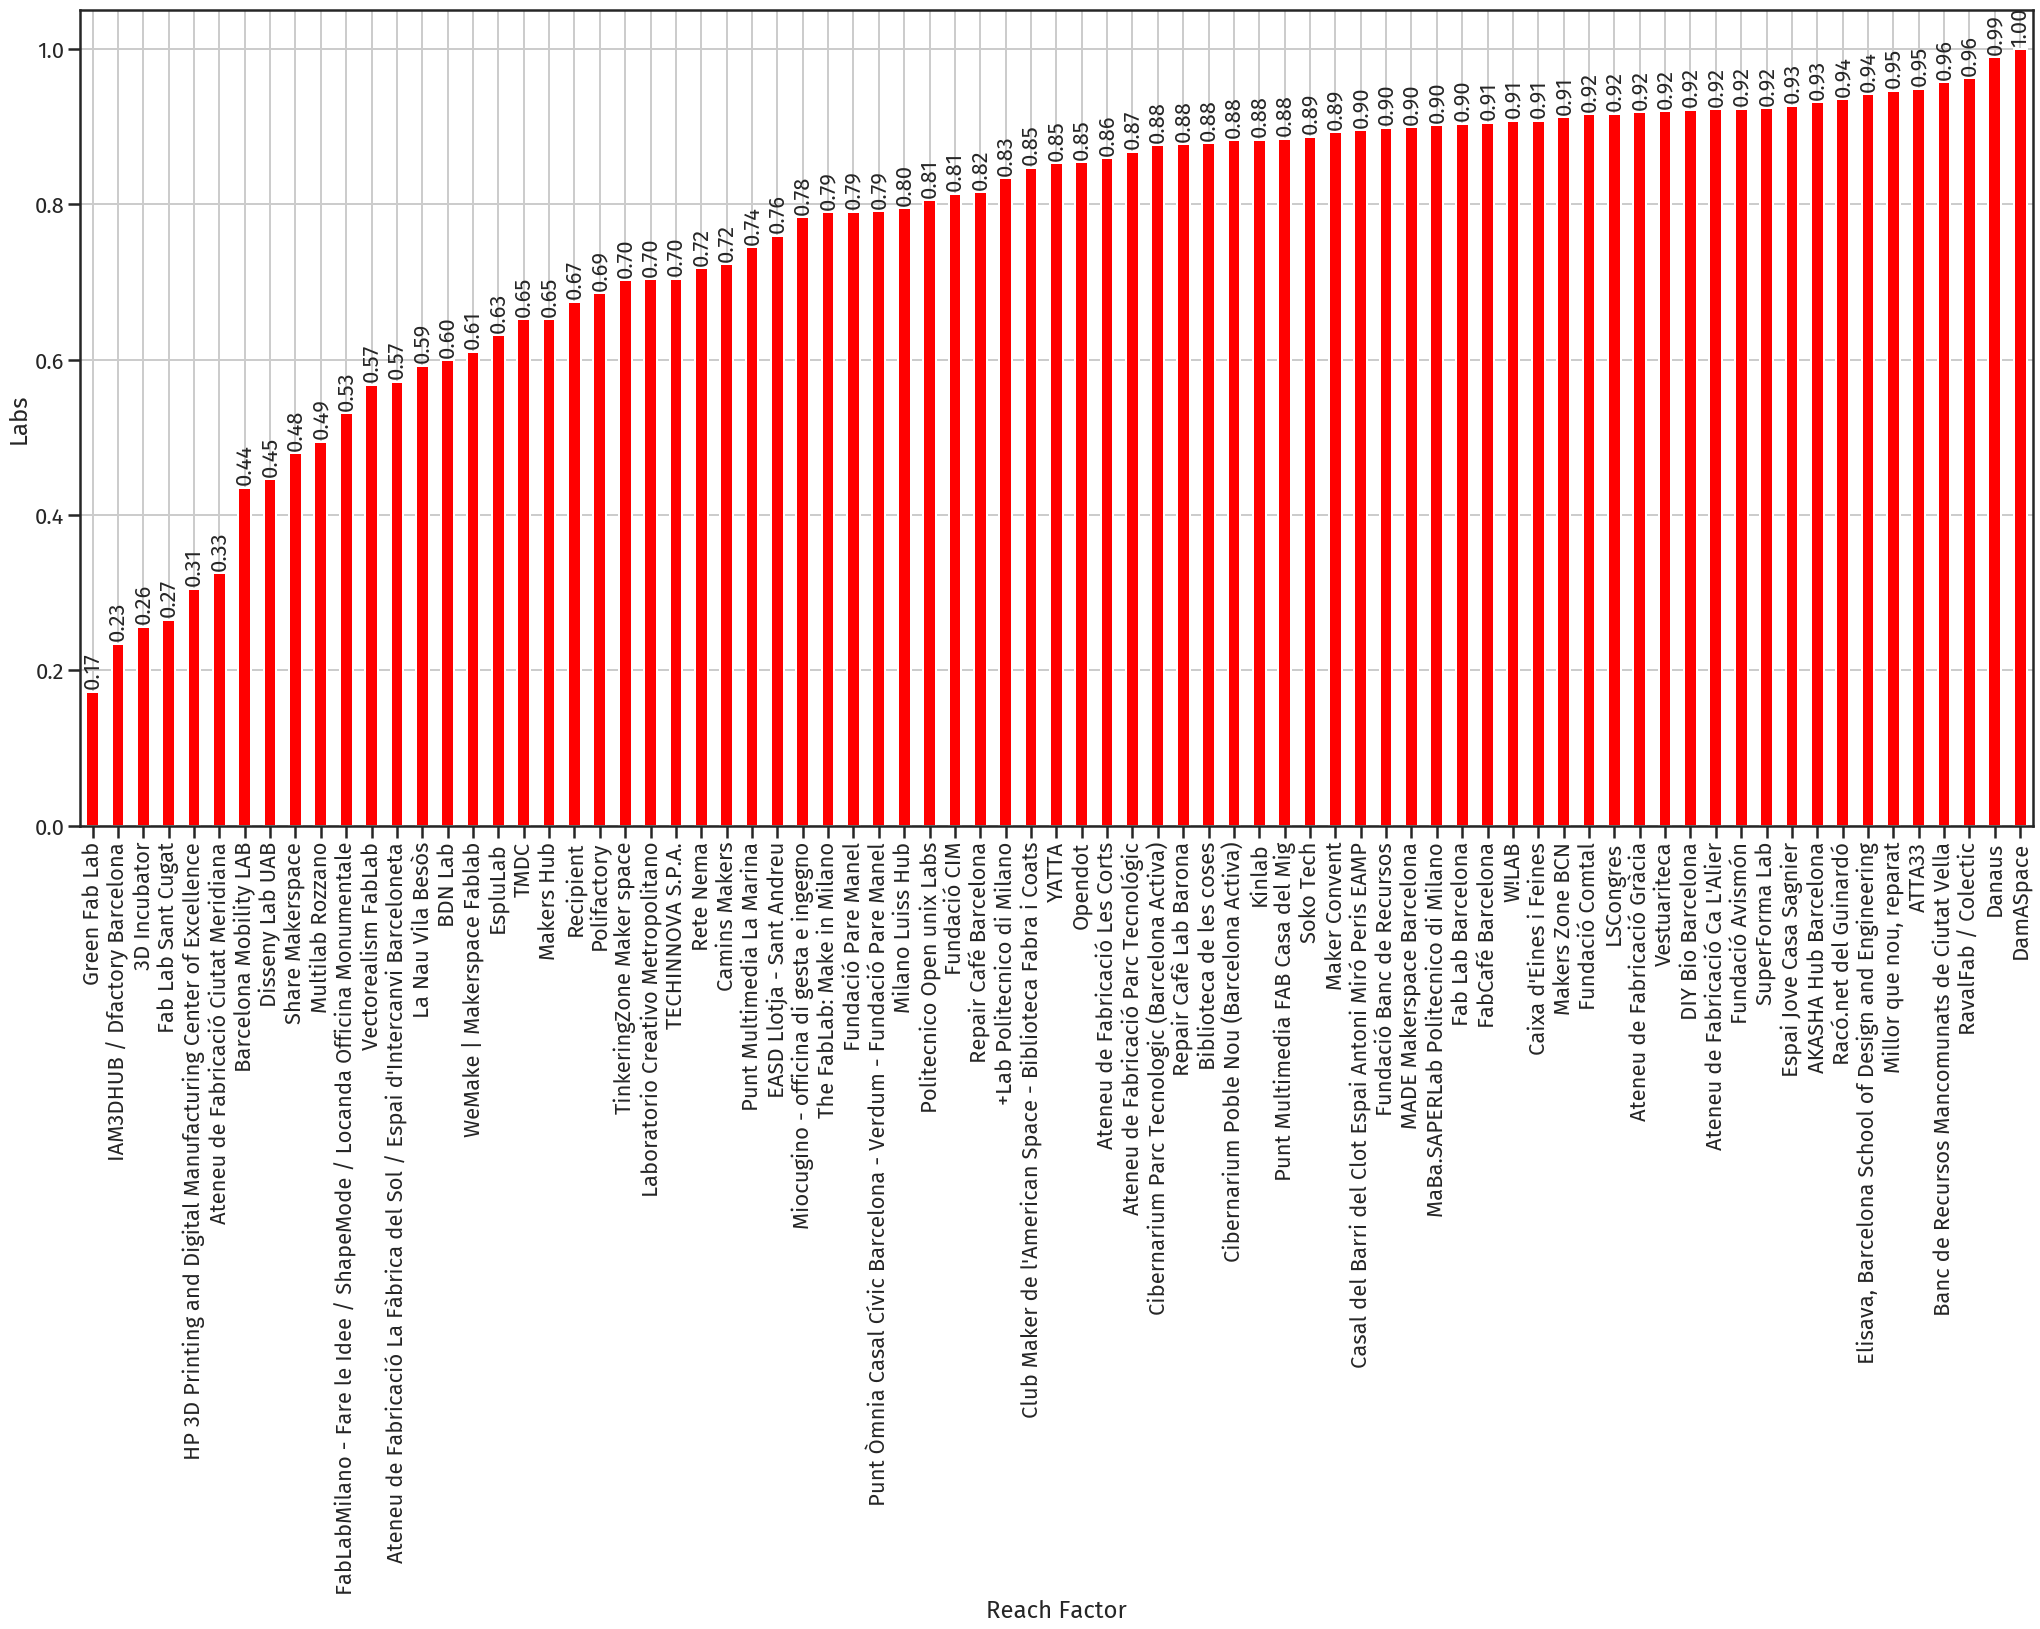

In [26]:
ax = map_data.sort_values(by=['reachfactor'])['reachfactor'].plot(kind="bar", figsize=(35,15), color="r")
ax.bar_label(ax.containers[0], fmt="%.2f", size=22, padding=3, rotation=90)
plt.xlabel('Reach Factor')
plt.ylabel('Labs')
plt.grid()
plt.savefig("svg" + os.sep + "metropolitan_area_labs_reachfactor_bar_vertical.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "metropolitan_area_labs_reachfactor_bar_vertical.png", dpi=300, bbox_inches="tight")

### Labs values clustered by city

In [27]:
full_map_data.groupby(["Cluster","Type"]).size()

Cluster  Type                                                                   
BCN      Ateneu de Fabricació                                                        5
         Ateneu de Fabricació / Barcelona Recircula – Tool Library / Repair Cafè     1
         Barcelona Recircula – Tool Library / Repair Cafè                            7
         City Space                                                                  6
         DIYBio Lab                                                                  1
         Fab Lab                                                                    10
         FabCafé                                                                     1
         Foundation                                                                  3
         Hackerspace                                                                 2
         Incubator-Accelerator                                                       4
         Industry R&D Lab                        

In [28]:
full_map_data.groupby("Cluster")["total_pop"].sum()

Cluster
BCN    3843085.0
MI     1004156.0
Name: total_pop, dtype: float64

In [29]:
full_map_data.groupby("Cluster")["total_pop"].describe()

count          mean           std      min       25%      50%  \
Cluster                                                                  
BCN       53.0  72511.037736  29231.523649     49.0  61277.00  86648.0   
MI        24.0  41839.833333  16319.319534  11656.0  30902.25  42484.0   

              75%       max  
Cluster                      
BCN      93219.00  101992.0  
MI       53581.25   69917.0

In [30]:
full_map_data.groupby("Cluster")["area"].sum()

Cluster
BCN    2.013231e+08
MI     8.750504e+07
Name: area, dtype: float64

In [31]:
full_map_data.groupby("Cluster")["area"].describe()

count          mean           std         min           25%  \
Cluster                                                                
BCN       53.0  3.798549e+06  1.103507e+06   845558.02  3.546988e+06   
MI        24.0  3.646043e+06  6.872685e+05  2356006.92  3.284123e+06   

                50%         75%         max  
Cluster                                      
BCN      4342148.62  4510074.18  4859209.70  
MI       3683316.64  4189997.28  4910677.26

In [32]:
full_map_data.groupby("Cluster")["reachfactor"].describe()

count      mean       std     min      25%      50%     75%     max
Cluster                                                                     
BCN       53.0  0.773842  0.224796  0.1723  0.72260  0.88460  0.9188  0.9899
MI        24.0  0.742746  0.139972  0.4800  0.66905  0.75035  0.8536  1.0000

plot the data

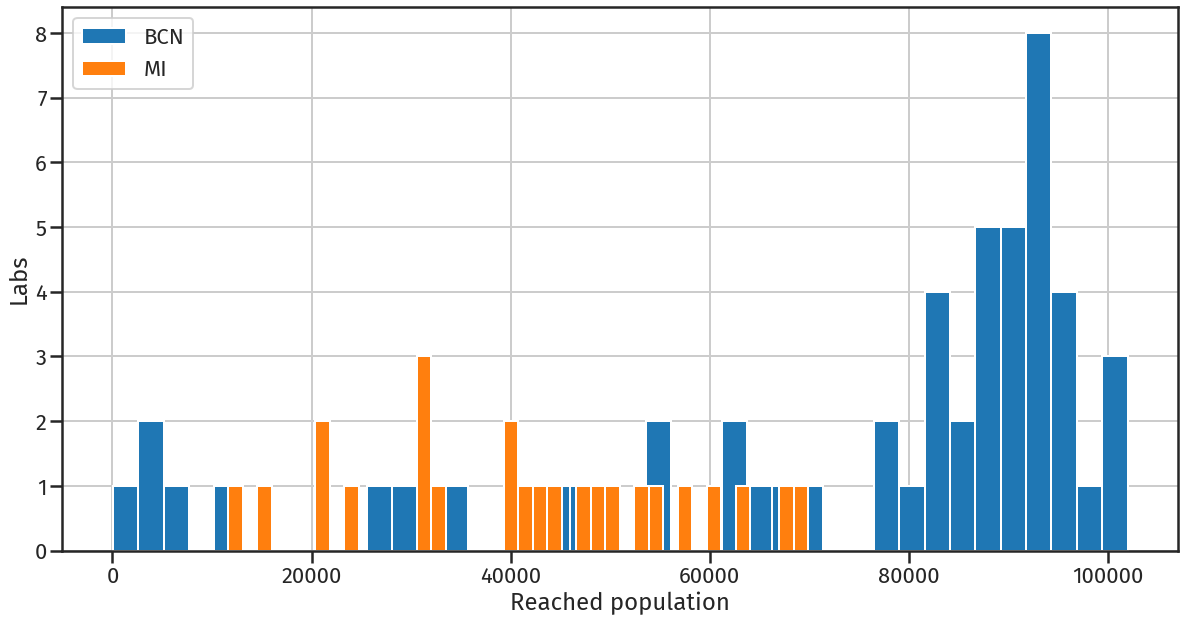

In [33]:
full_map_data.groupby("Cluster")["total_pop"].plot(kind="hist", bins=40, figsize=(20,10), legend=True)
plt.xlabel('Reached population')
plt.ylabel('Labs')
plt.grid()
plt.savefig("svg" + os.sep + "metropolitan_area_labs_population_grouped_hist.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "metropolitan_area_labs_population_grouped_hist.png", dpi=300, bbox_inches="tight")

plot the data for each lab

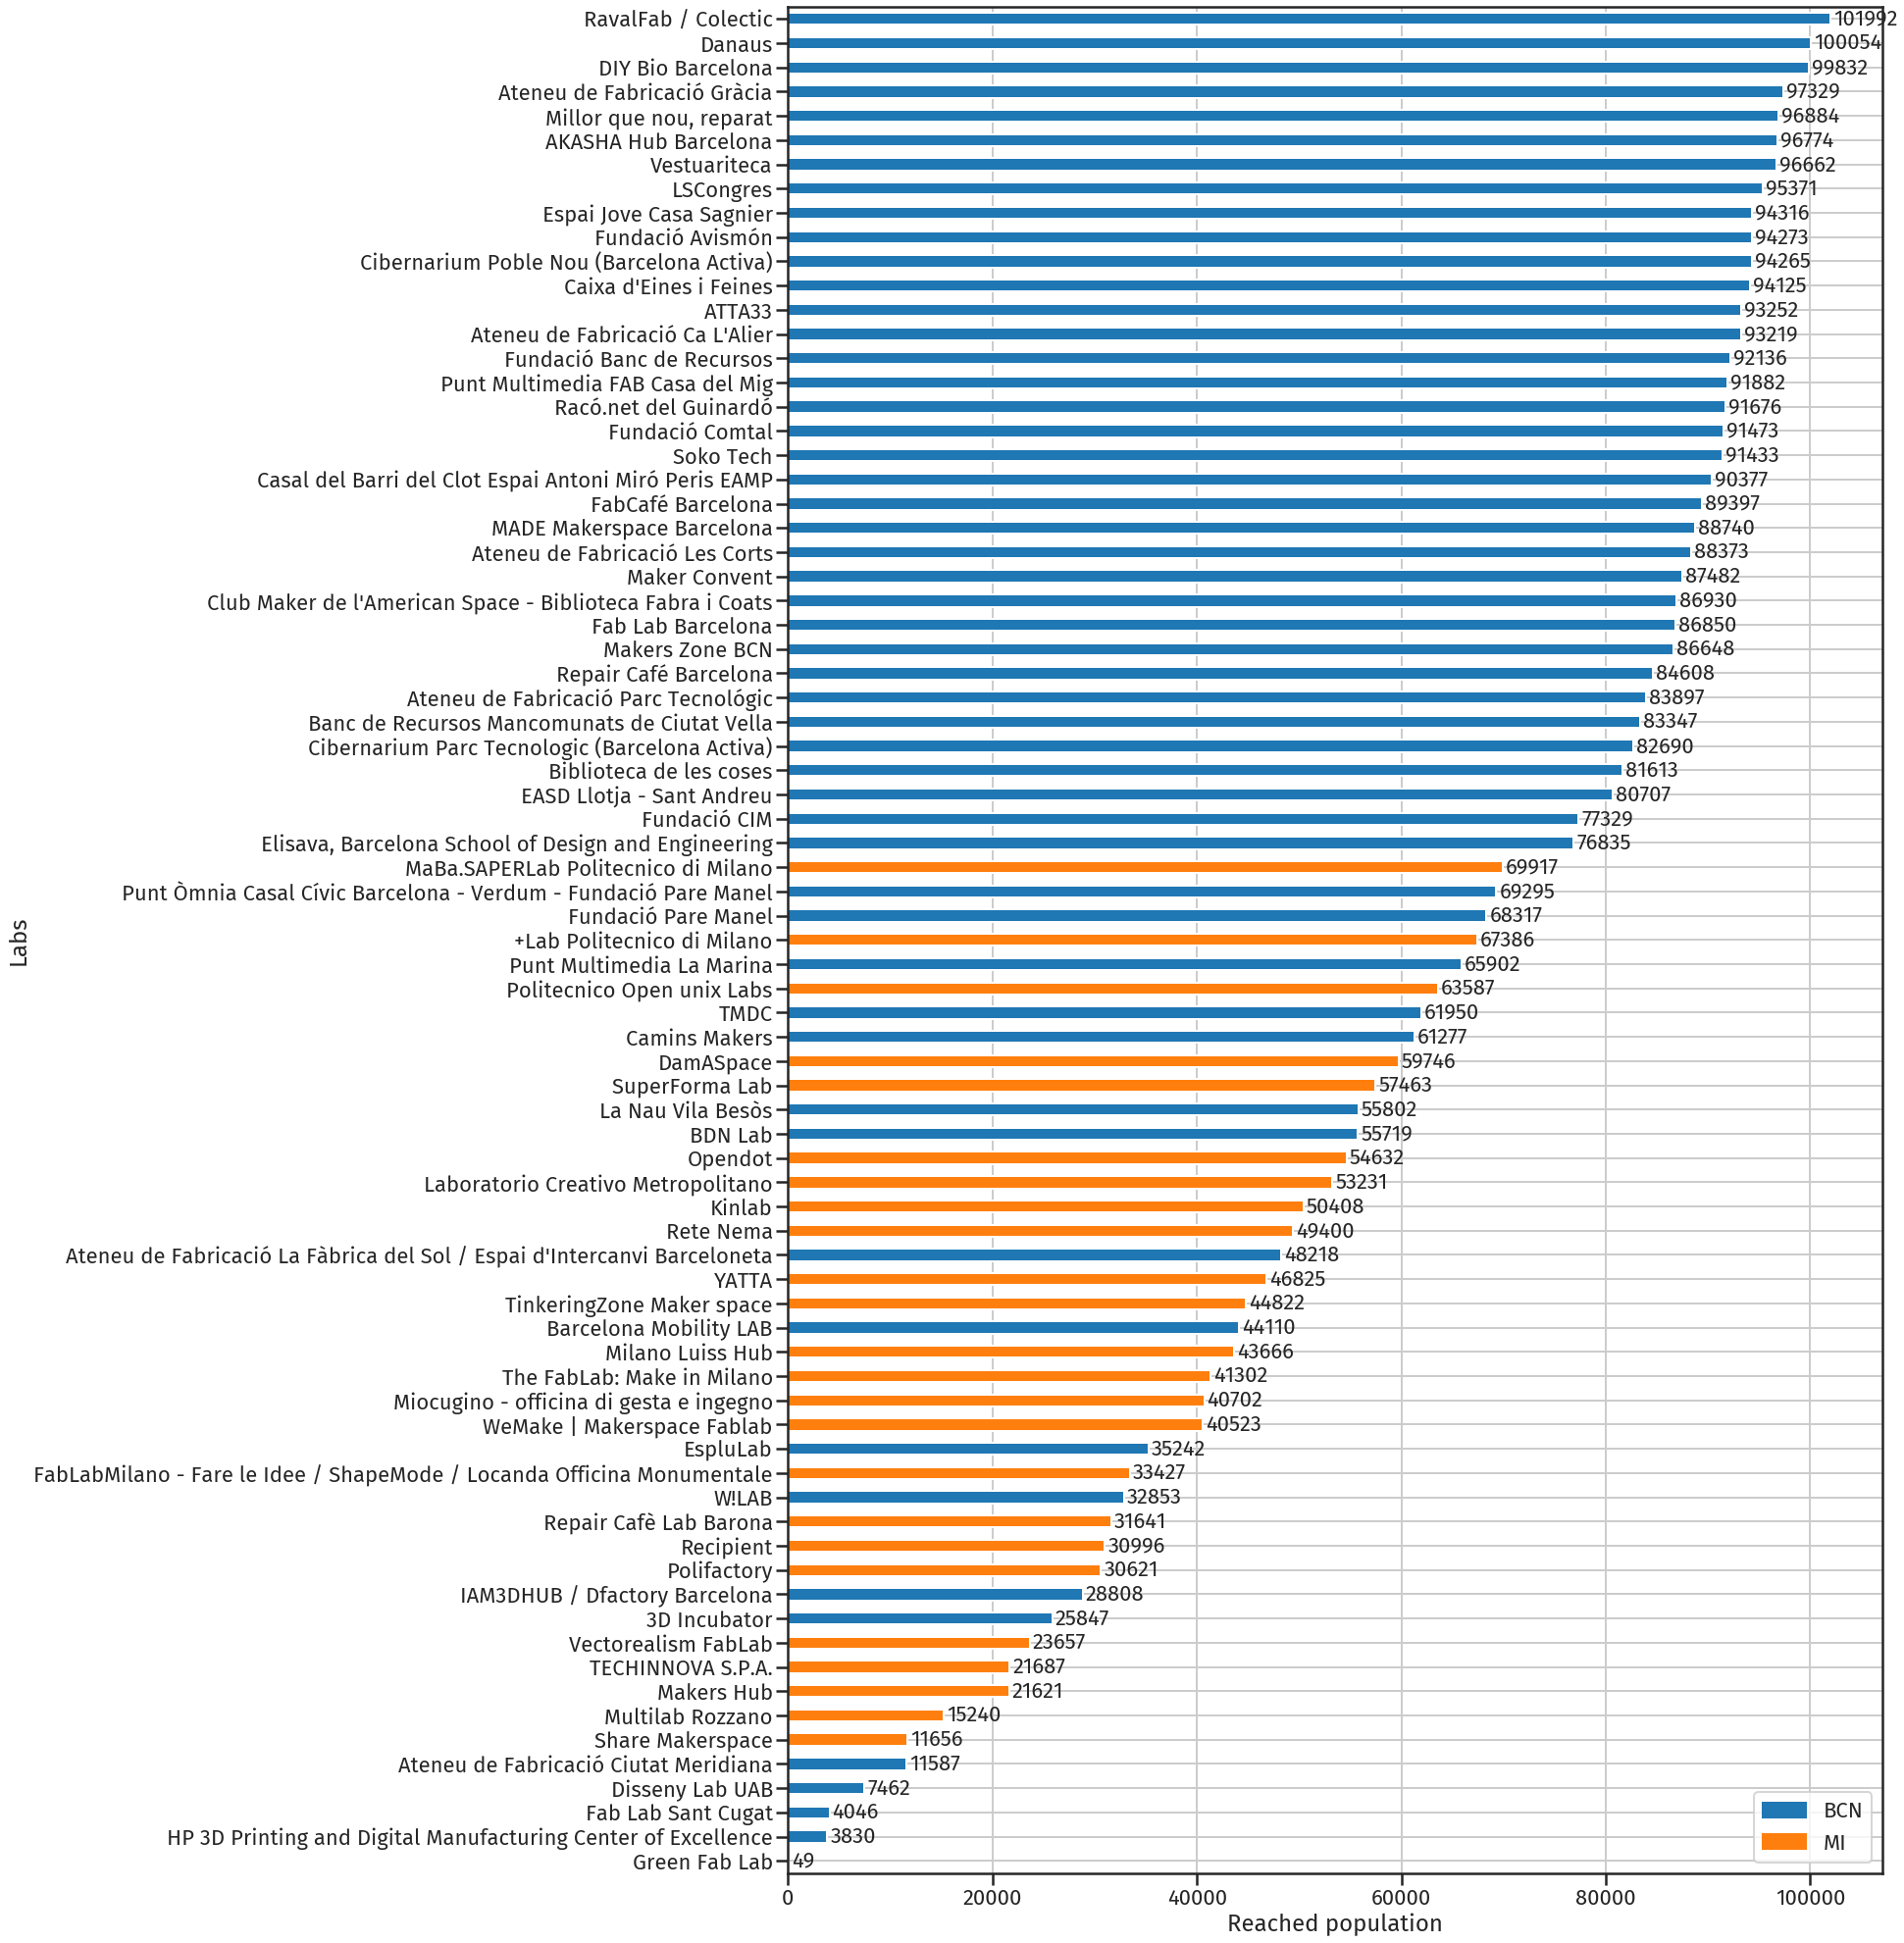

In [34]:
colors = {'BCN': sns.color_palette()[0], 'MI': sns.color_palette()[1]}
ax = full_map_data.sort_values(by=['total_pop'])['total_pop'].plot(kind='barh', color=[colors[i] for i in full_map_data.sort_values(by=['total_pop'])['Cluster']], figsize=(20,35), legend=True)
ax.bar_label(ax.containers[0], fmt="%d", size=22, padding=3)
legend_elements = [Patch(facecolor=colors['BCN'], edgecolor=colors['BCN'],label='BCN'), Patch(facecolor=colors['MI'], edgecolor=colors['MI'],label='MI')]
ax.legend(handles=legend_elements)
plt.xlabel('Reached population')
plt.ylabel('Labs')
plt.grid()
plt.savefig("svg" + os.sep + "metropolitan_area_labs_population_grouped_bar.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "metropolitan_area_labs_population_grouped_bar.png", dpi=300, bbox_inches="tight")

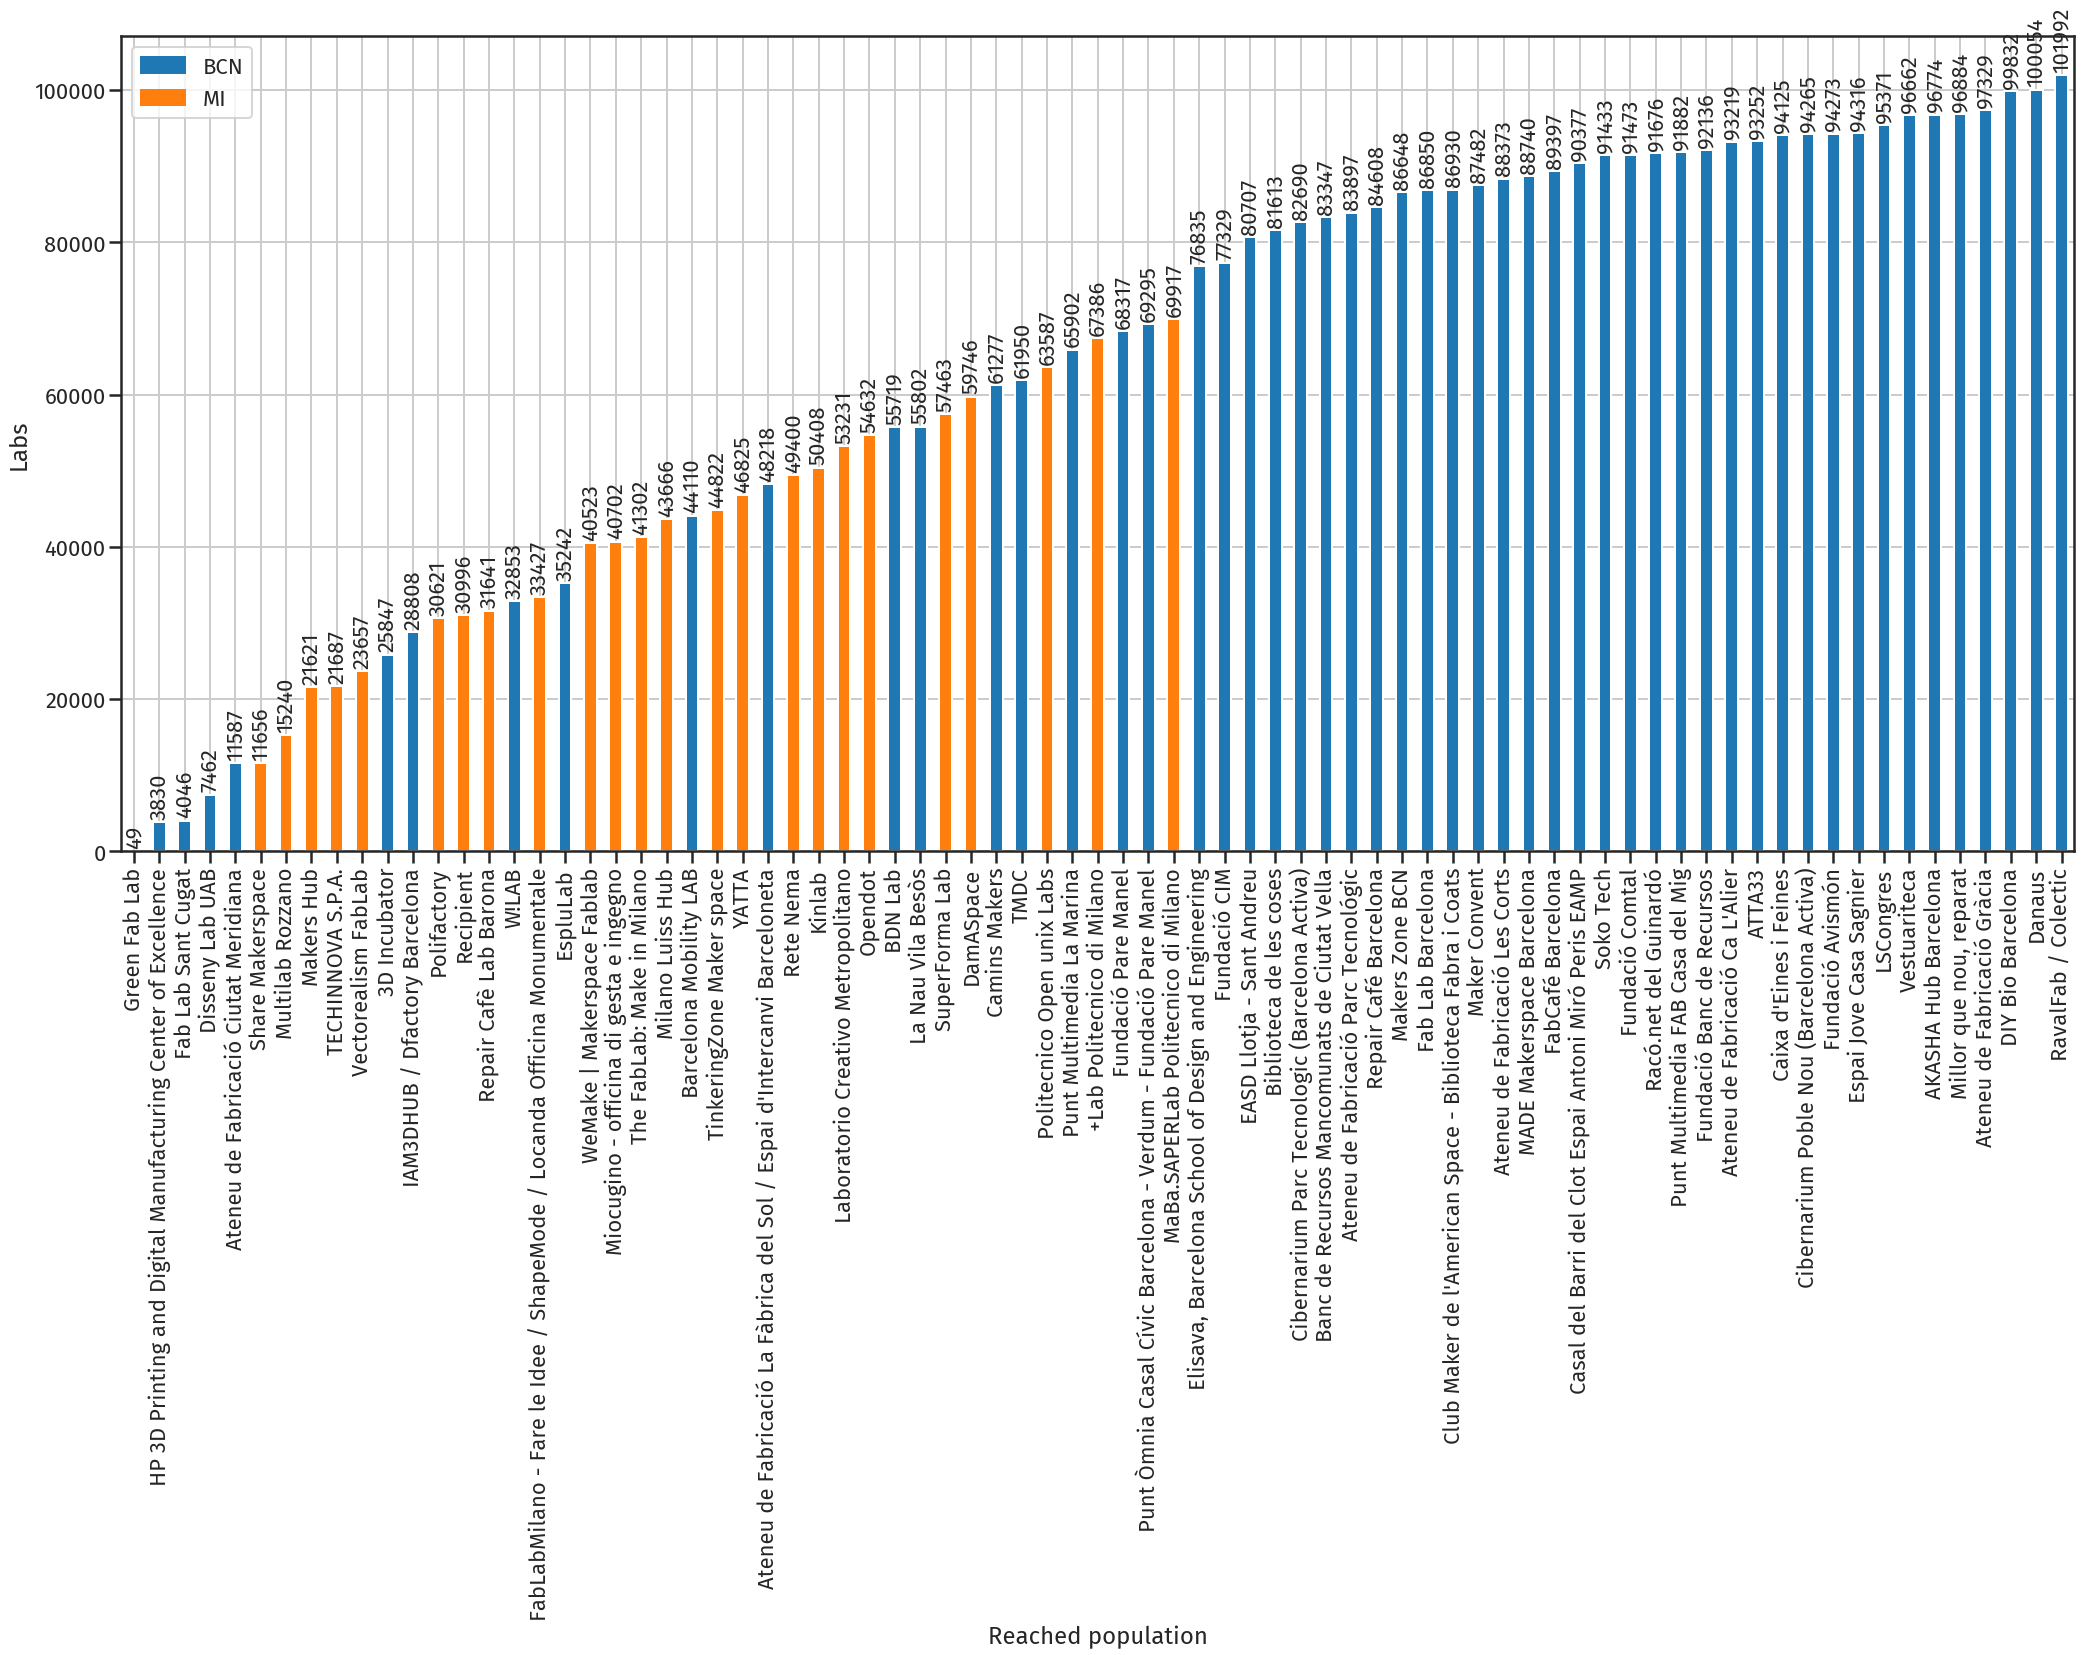

In [35]:
colors = {'BCN': sns.color_palette()[0], 'MI': sns.color_palette()[1]}
ax = full_map_data.sort_values(by=['total_pop'])['total_pop'].plot(kind='bar', color=[colors[i] for i in full_map_data.sort_values(by=['total_pop'])['Cluster']], figsize=(35,15), legend=True)
ax.bar_label(ax.containers[0], fmt="%d", size=22, padding=3, rotation=90)
legend_elements = [Patch(facecolor=colors['BCN'], edgecolor=colors['BCN'],label='BCN'), Patch(facecolor=colors['MI'], edgecolor=colors['MI'],label='MI')]
ax.legend(handles=legend_elements)
plt.xlabel('Reached population')
plt.ylabel('Labs')
plt.grid()
plt.savefig("svg" + os.sep + "metropolitan_area_labs_population_grouped_bar_vertical.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "metropolitan_area_labs_population_grouped_bar_vertical.png", dpi=300, bbox_inches="tight")

plot the data

In [36]:
full_map_data["area"] = full_map_data["area"].divide(1000000)

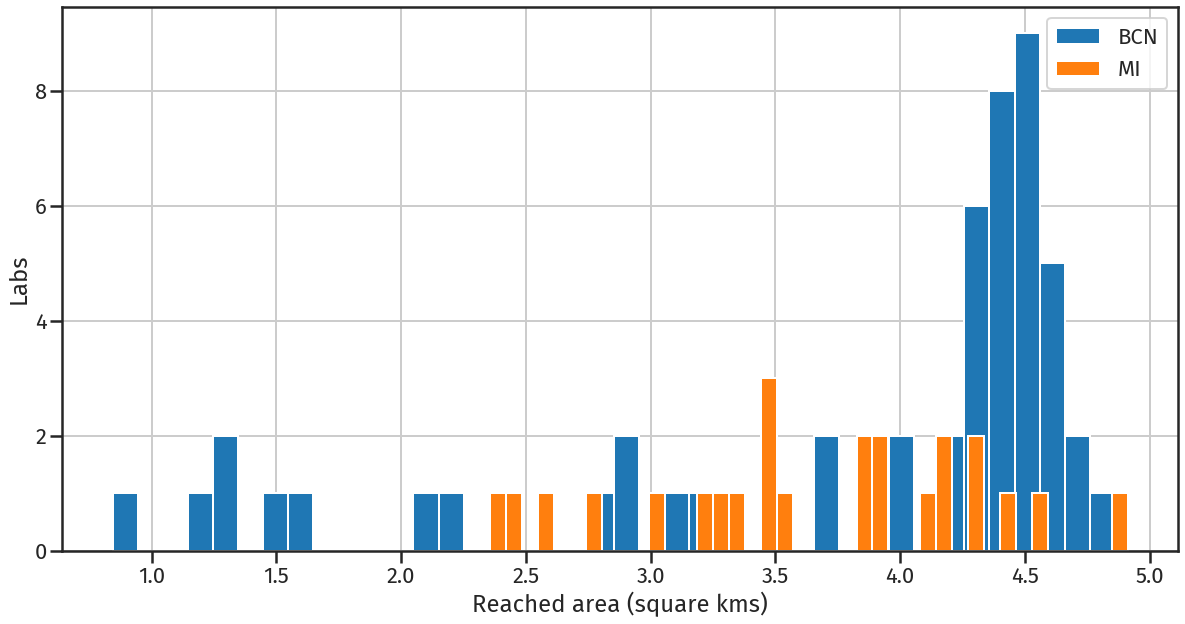

In [37]:
full_map_data.groupby("Cluster")["area"].plot(kind="hist", bins=40, figsize=(20,10), legend=True)
plt.xlabel('Reached area (square kms)')
plt.ylabel('Labs')
plt.grid()
plt.savefig("svg" + os.sep + "metropolitan_area_labs_area_grouped_hist.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "metropolitan_area_labs_area_grouped_hist.png", dpi=300, bbox_inches="tight")

plot the data 

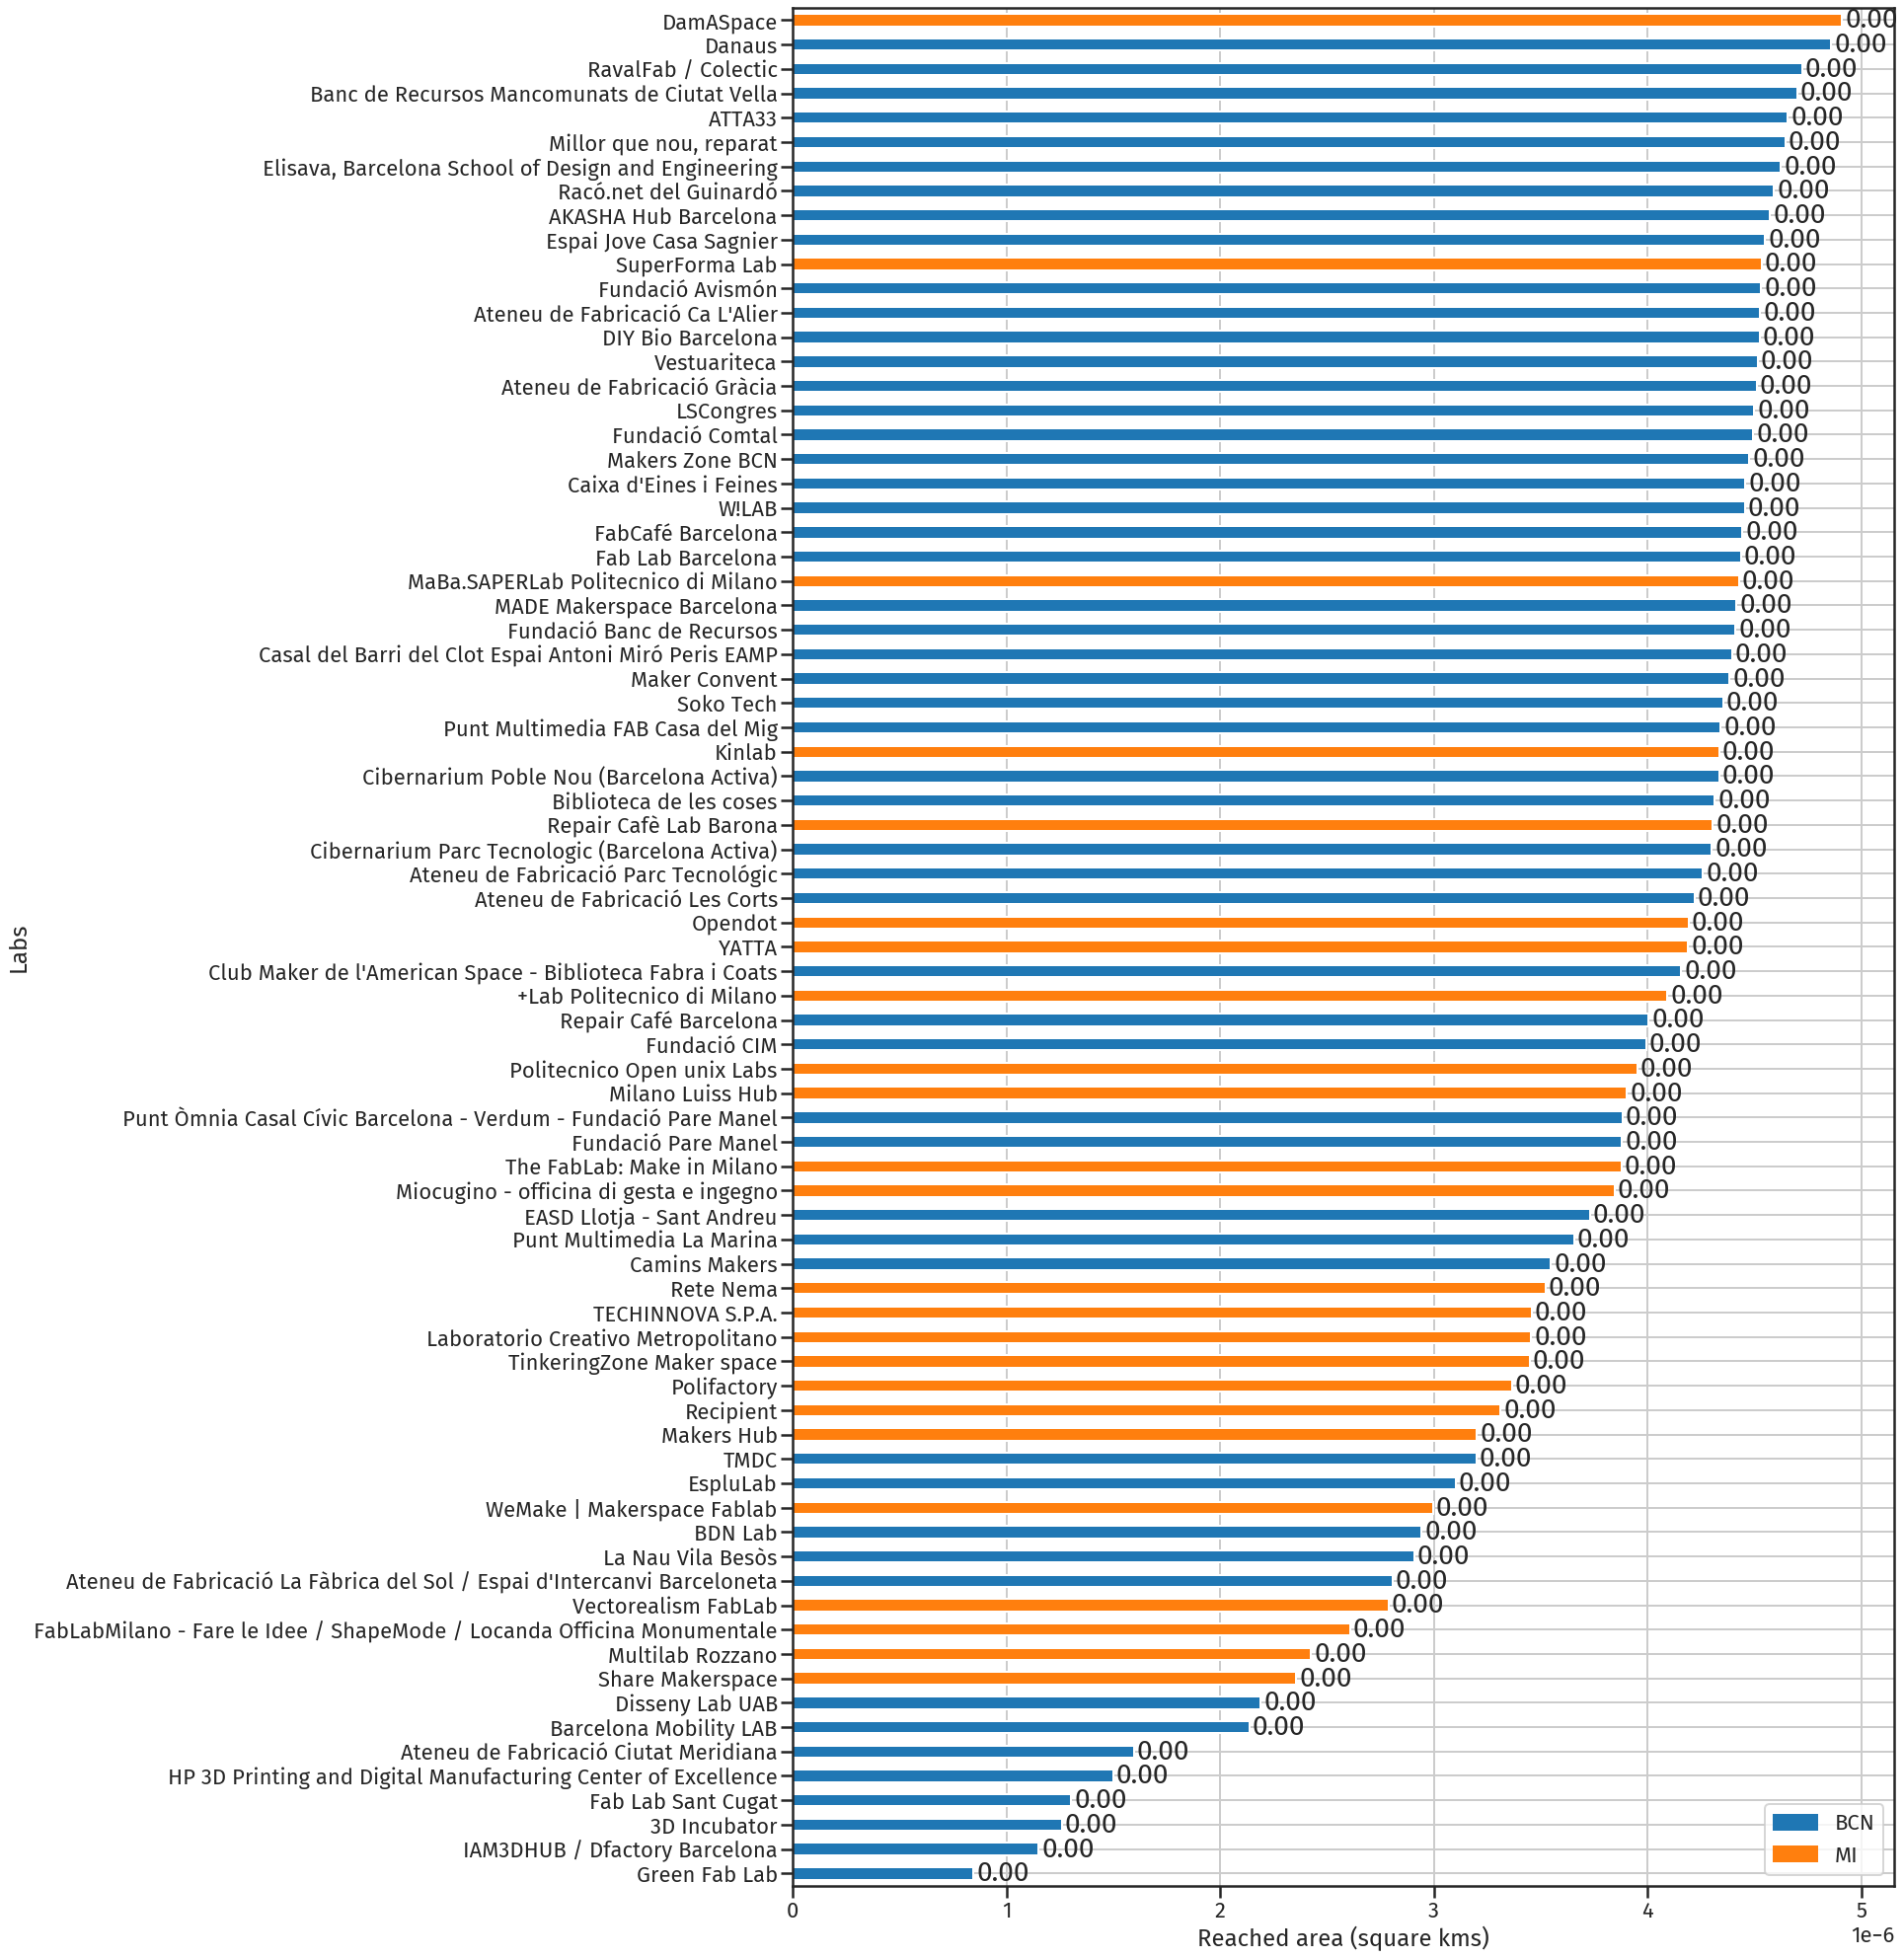

In [38]:
colors = {'BCN': sns.color_palette()[0], 'MI': sns.color_palette()[1]}
ax = full_map_data.sort_values(by=['area'])['area'].divide(1000000).plot(kind='barh', color=[colors[i] for i in full_map_data.sort_values(by=['area'])['Cluster']], figsize=(20,35), legend=True)
ax.bar_label(ax.containers[0], fmt="%.2f", size=28, padding=3)
legend_elements = [Patch(facecolor=colors['BCN'], edgecolor=colors['BCN'],label='BCN'), Patch(facecolor=colors['MI'], edgecolor=colors['MI'],label='MI')]
ax.legend(handles=legend_elements)
plt.xlabel('Reached area (square kms)')
plt.ylabel('Labs')
plt.grid()
plt.savefig("svg" + os.sep + "metropolitan_area_labs_area_grouped_bar.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "metropolitan_area_labs_area_grouped_bar.png", dpi=300, bbox_inches="tight")

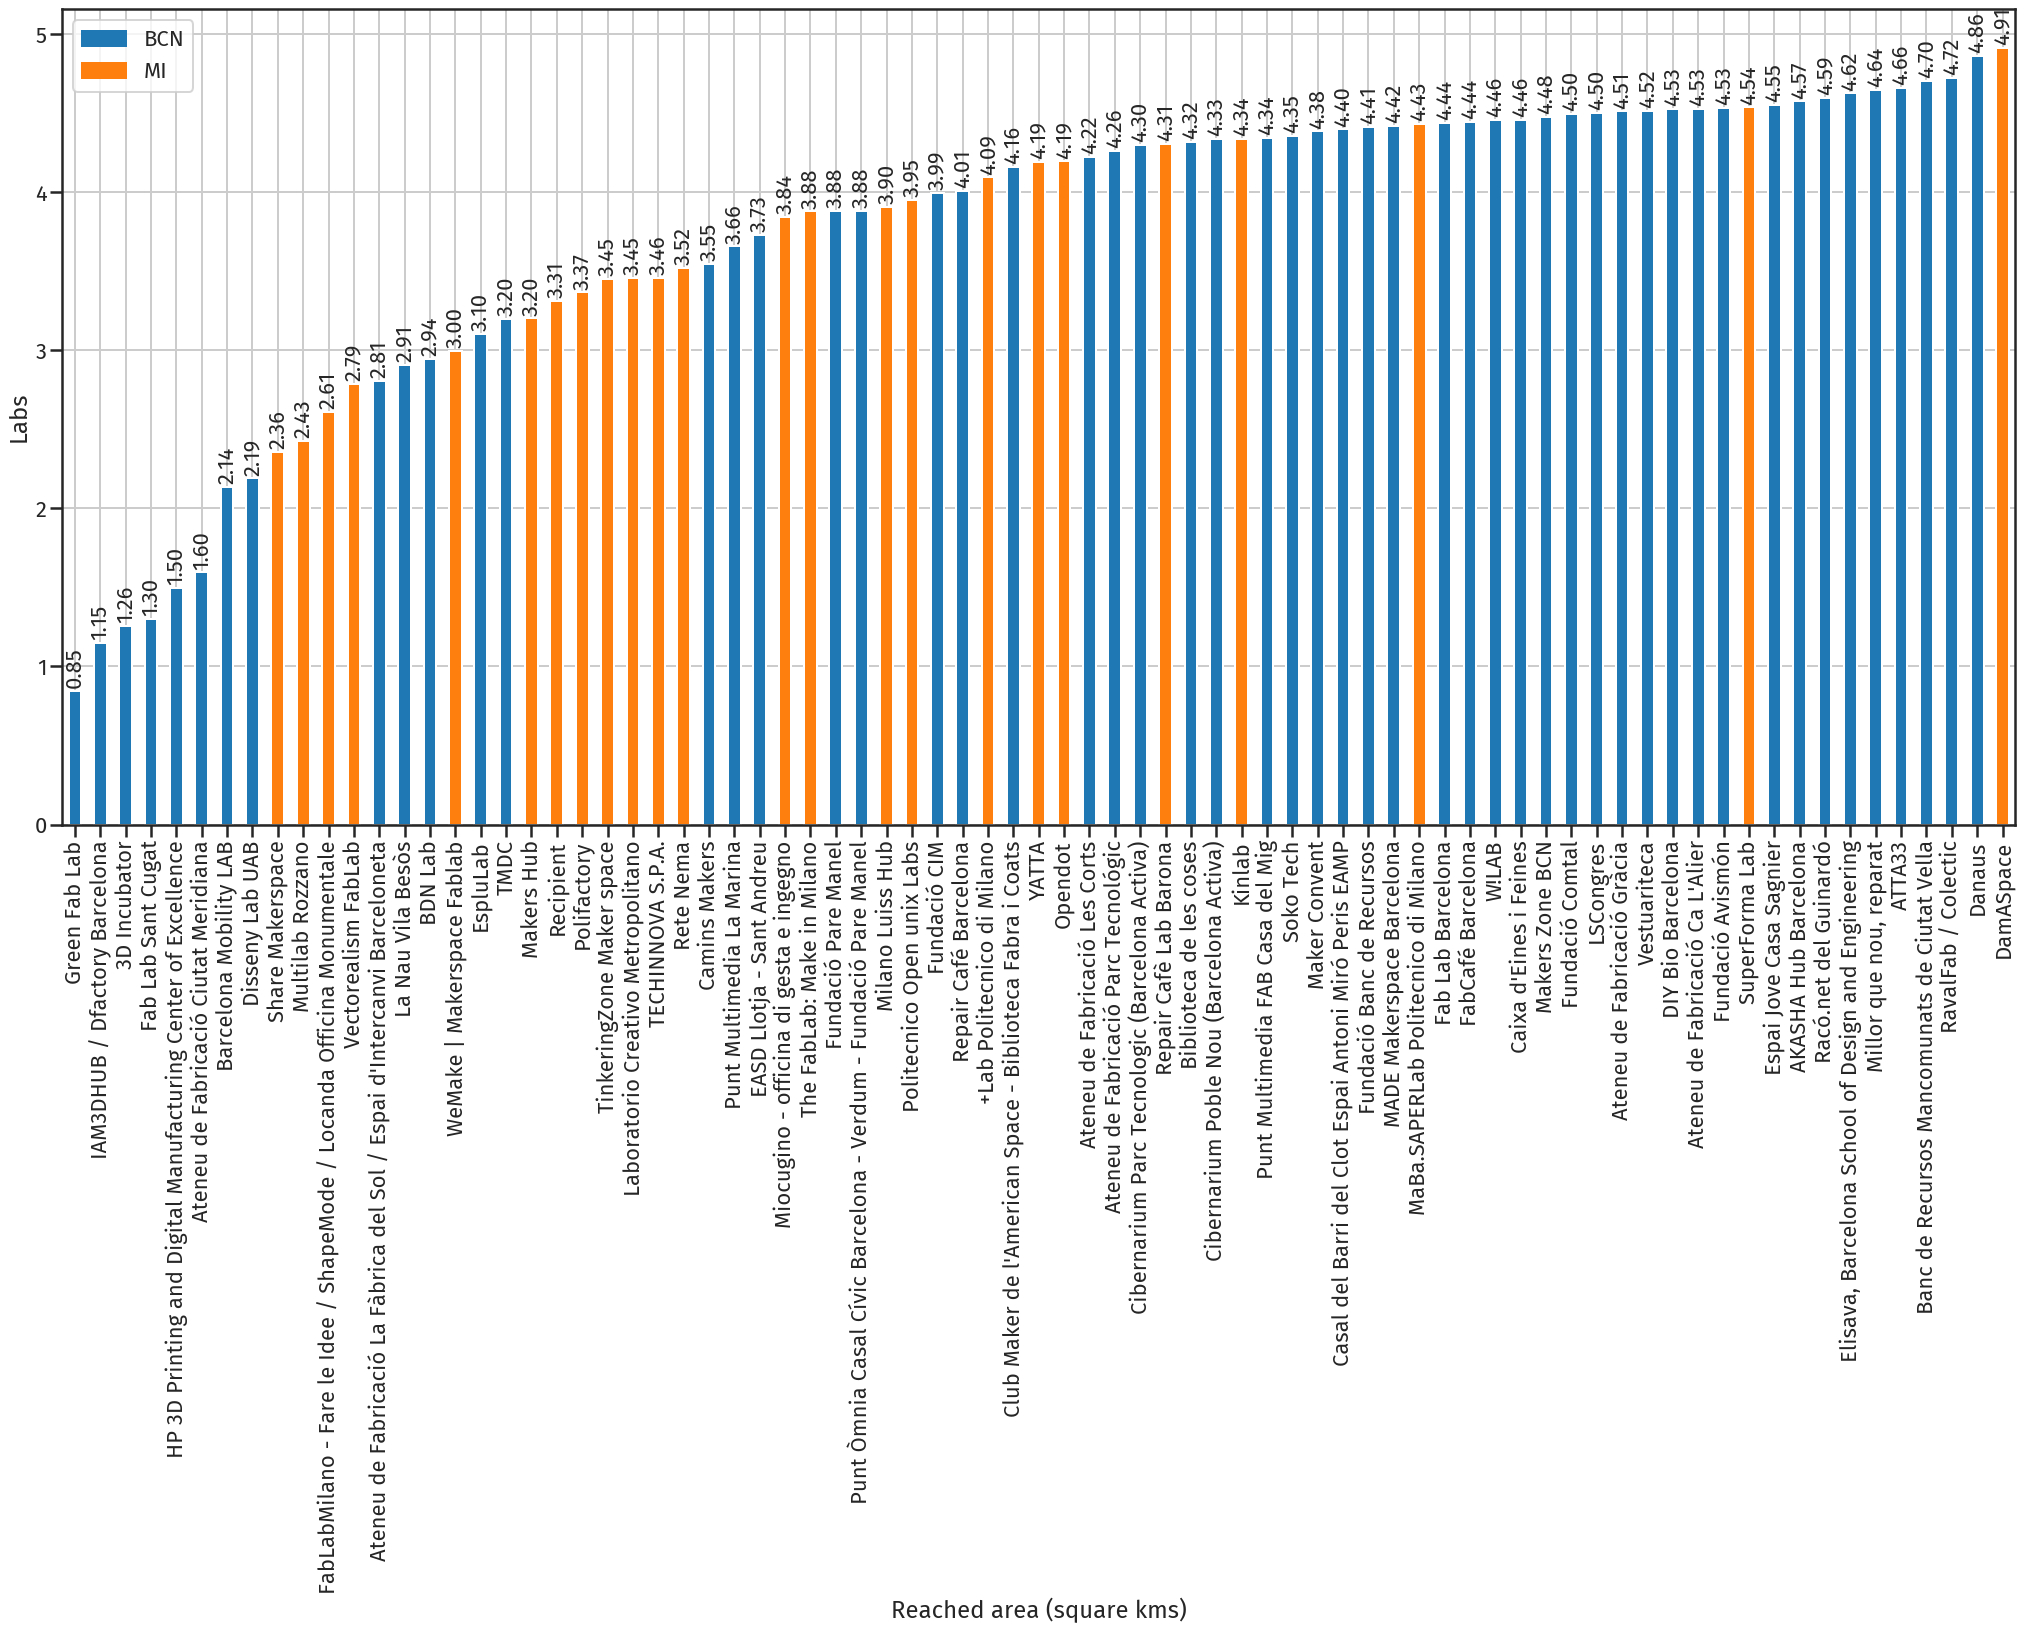

In [39]:
colors = {'BCN': sns.color_palette()[0], 'MI': sns.color_palette()[1]}
ax = full_map_data.sort_values(by=['area'])['area'].plot(kind='bar', color=[colors[i] for i in full_map_data.sort_values(by=['area'])['Cluster']], figsize=(35,15), legend=True)
ax.bar_label(ax.containers[0], fmt="%.2f", size=22, padding=3, rotation=90)
legend_elements = [Patch(facecolor=colors['BCN'], edgecolor=colors['BCN'],label='BCN'), Patch(facecolor=colors['MI'], edgecolor=colors['MI'],label='MI')]
ax.legend(handles=legend_elements)
plt.xlabel('Reached area (square kms)')
plt.ylabel('Labs')
plt.grid()
plt.savefig("svg" + os.sep + "metropolitan_area_labs_area_grouped_bar_vertical.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "metropolitan_area_labs_area_grouped_bar_vertical.png", dpi=300, bbox_inches="tight")

plot the data

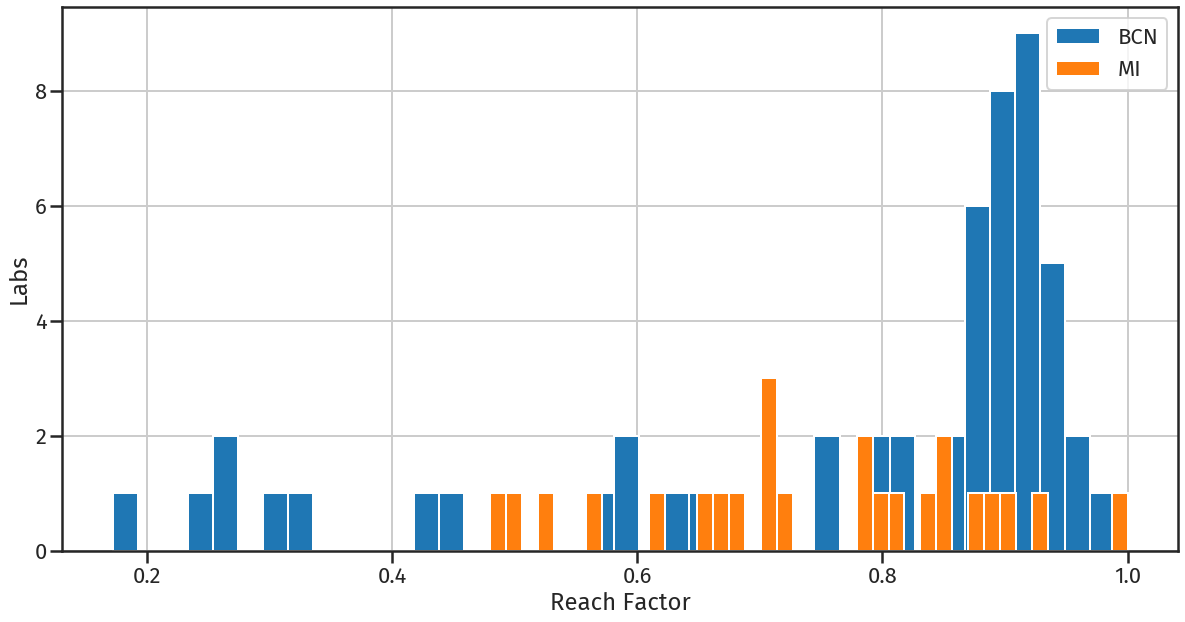

In [40]:
full_map_data.groupby("Cluster")["reachfactor"].plot(kind="hist", bins=40, figsize=(20,10), legend=True)
plt.xlabel('Reach Factor')
plt.ylabel('Labs')
plt.grid()
plt.savefig("svg" + os.sep + "metropolitan_area_labs_reachfactor_grouped_hist.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "metropolitan_area_labs_reachfactor_grouped_hist.png", dpi=300, bbox_inches="tight")

plot the data

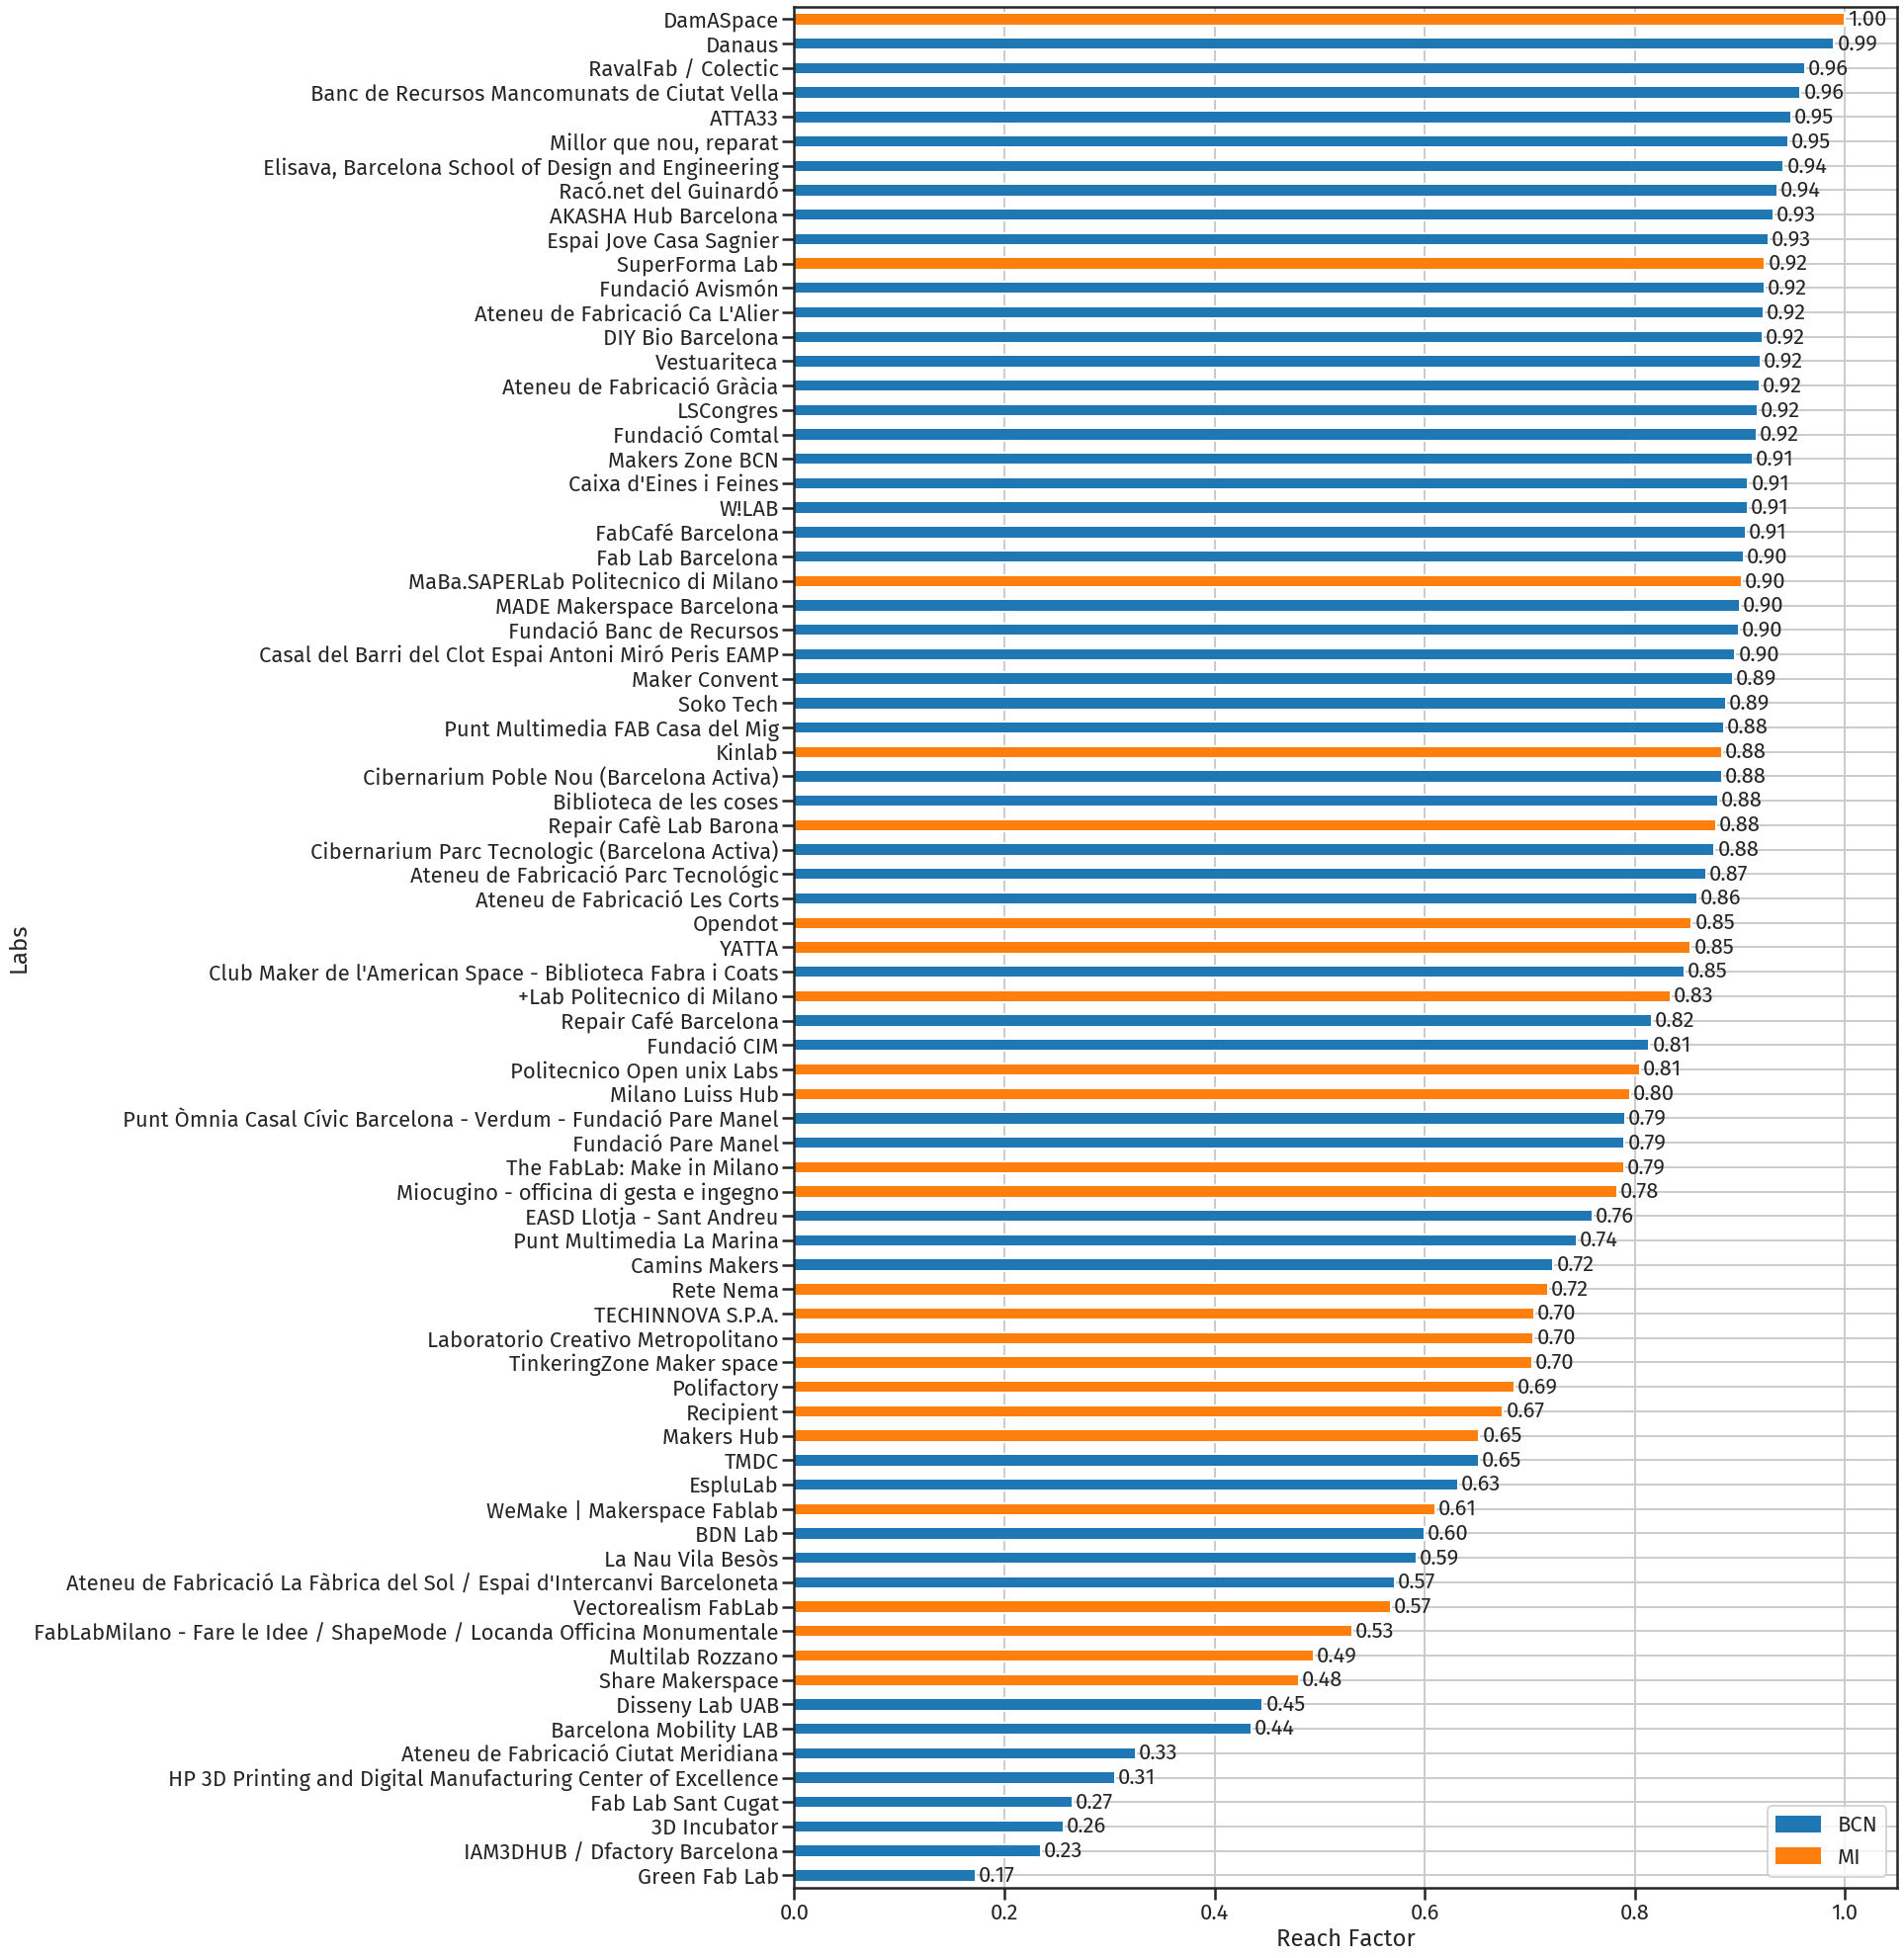

In [41]:
colors = {'BCN': sns.color_palette()[0], 'MI': sns.color_palette()[1]}
ax = full_map_data.sort_values(by=['reachfactor'])['reachfactor'].plot(kind='barh', color=[colors[i] for i in full_map_data.sort_values(by=['reachfactor'])['Cluster']], figsize=(20,35), legend=True)
ax.bar_label(ax.containers[0], fmt="%.2f", size=22, padding=3)
legend_elements = [Patch(facecolor=colors['BCN'], edgecolor=colors['BCN'],label='BCN'), Patch(facecolor=colors['MI'], edgecolor=colors['MI'],label='MI')]
ax.legend(handles=legend_elements)
plt.xlabel('Reach Factor')
plt.ylabel('Labs')
plt.grid()
plt.savefig("svg" + os.sep + "metropolitan_area_labs_reachfactor_grouped_bar.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "metropolitan_area_labs_reachfactor_grouped_bar.png", dpi=300, bbox_inches="tight")

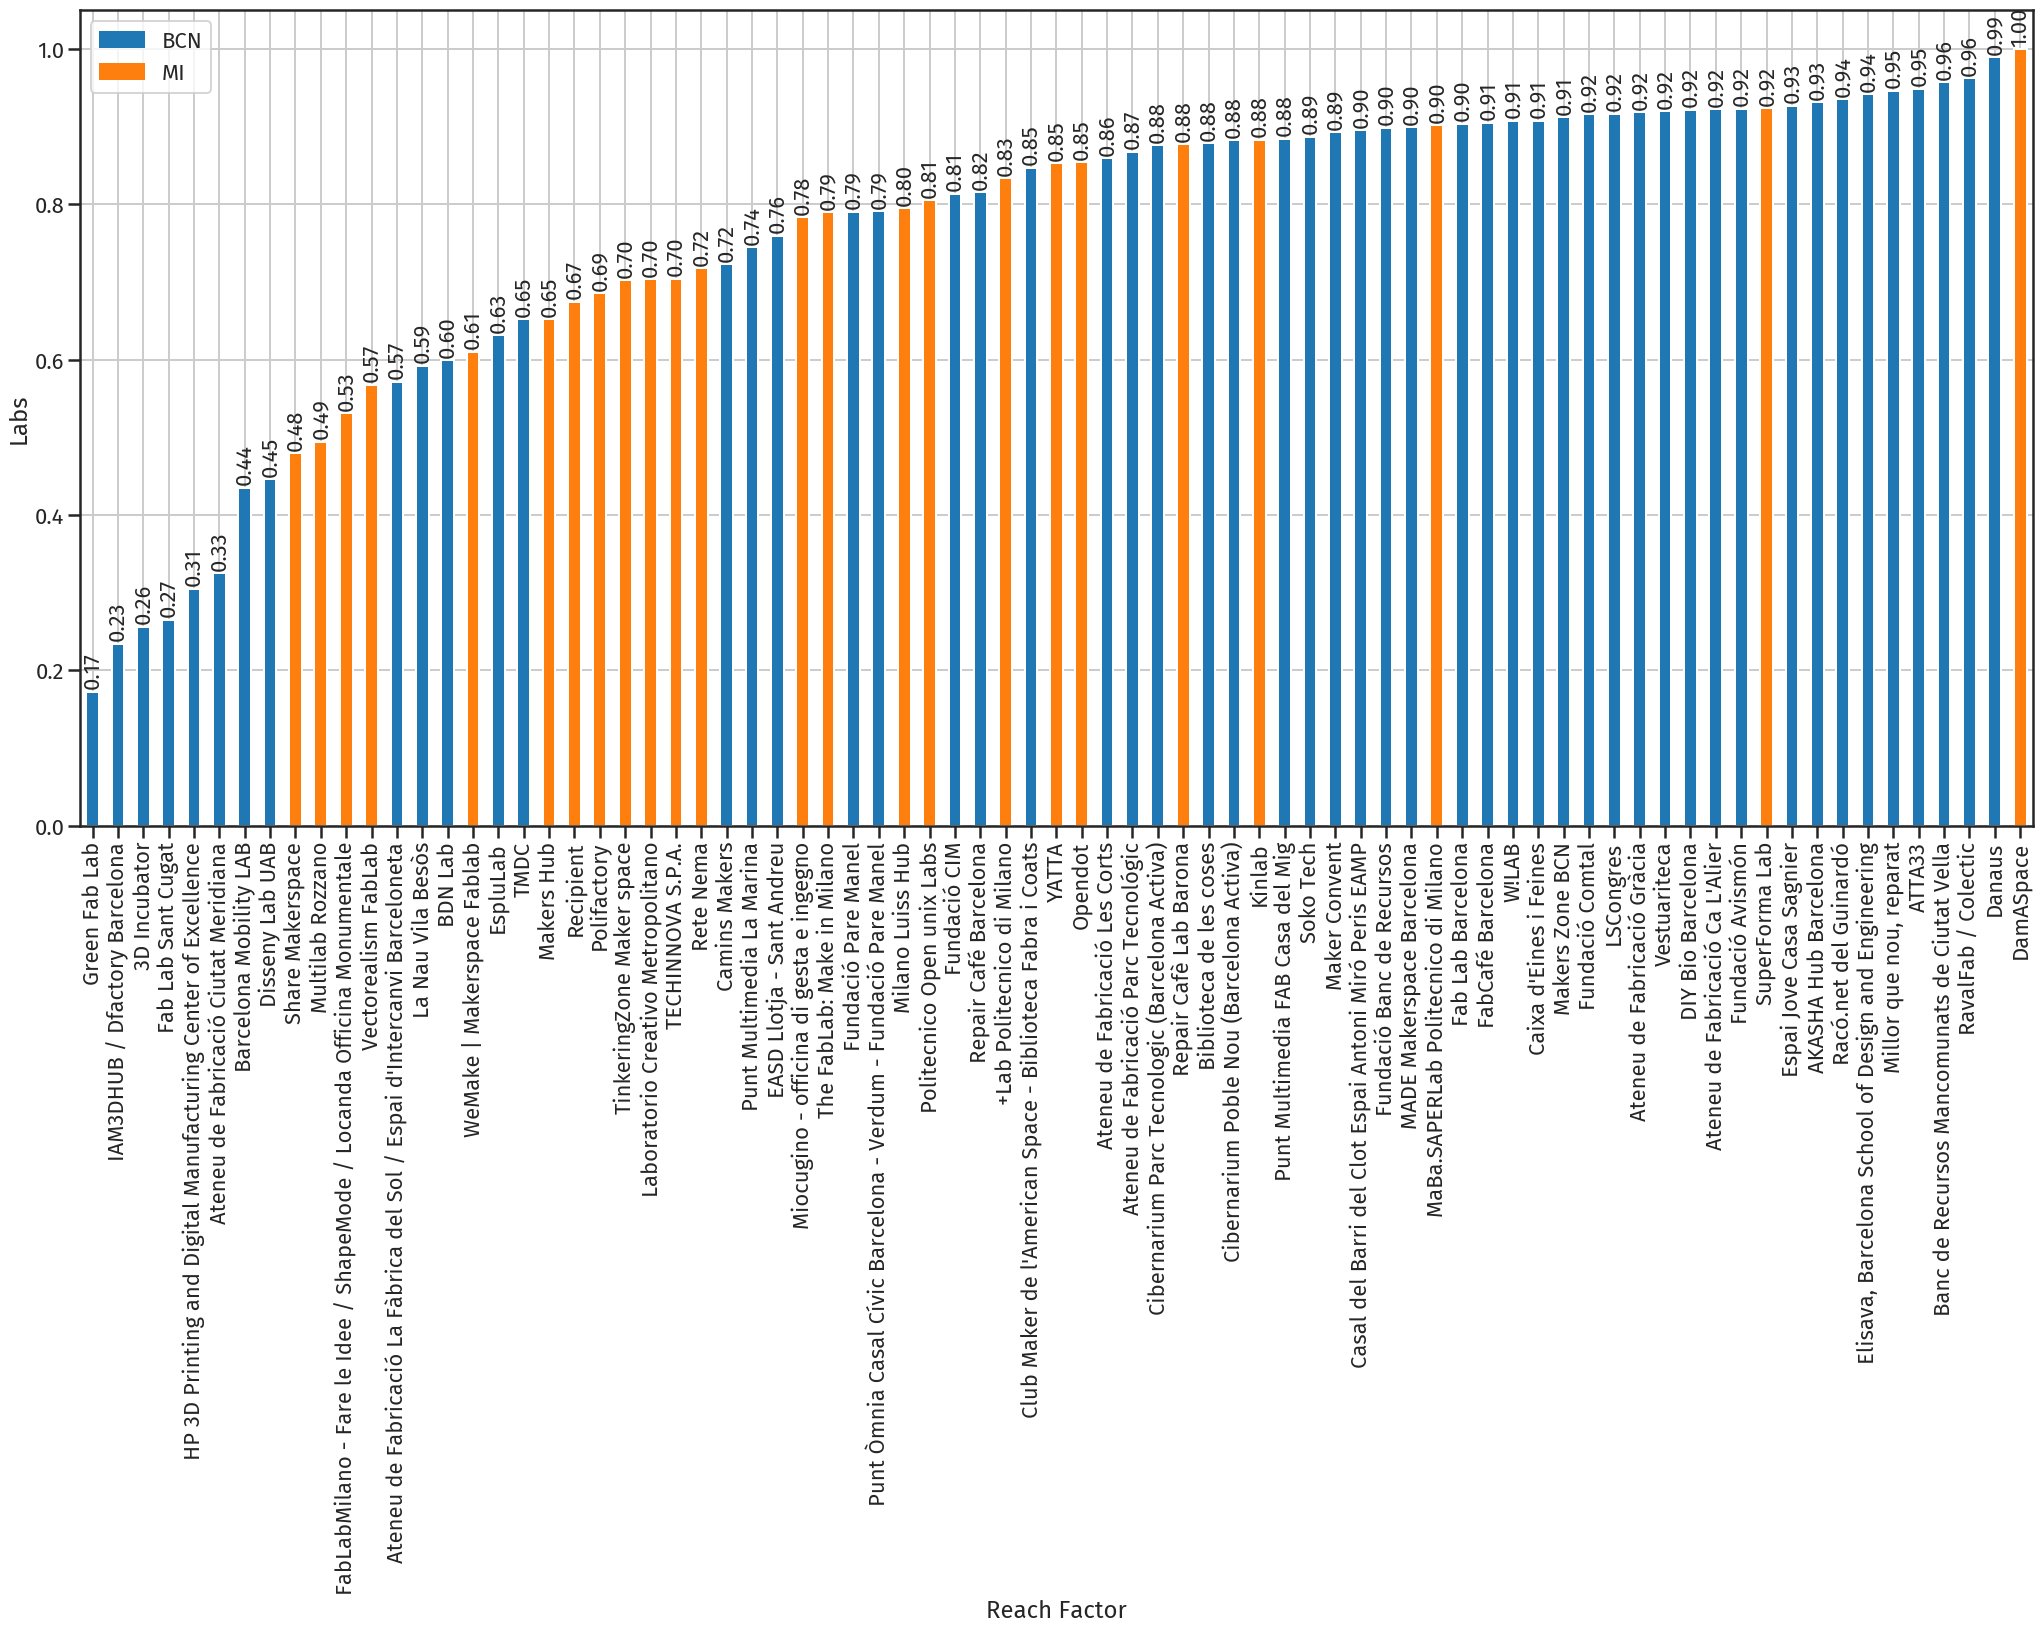

In [42]:
colors = {'BCN': sns.color_palette()[0], 'MI': sns.color_palette()[1]}
ax = full_map_data.sort_values(by=['reachfactor'])['reachfactor'].plot(kind='bar', color=[colors[i] for i in full_map_data.sort_values(by=['reachfactor'])['Cluster']], figsize=(35,15), legend=True)
ax.bar_label(ax.containers[0], fmt="%.2f", size=22, padding=3, rotation=90)
legend_elements = [Patch(facecolor=colors['BCN'], edgecolor=colors['BCN'],label='BCN'), Patch(facecolor=colors['MI'], edgecolor=colors['MI'],label='MI')]
ax.legend(handles=legend_elements)
plt.xlabel('Reach Factor')
plt.ylabel('Labs')
plt.grid()
plt.savefig("svg" + os.sep + "metropolitan_area_labs_reachfactor_grouped_bar_vertical.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "metropolitan_area_labs_reachfactor_grouped_bar:vertical.png", dpi=300, bbox_inches="tight")

### Isochrones

create the map

In [43]:
m=folium.Map(location=[41.396721,2.1943200000000003],tiles='stamentoner')
folium.TileLayer('OpenStreetMap').add_to(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)

In [44]:
for iso in data:
  folium.GeoJson(iso, name="geojson").add_to(m)
for loc in locations:
  #folium.Marker(location=[locations[loc][1],locations[loc][0]],popup=loc,tooltip=loc).add_to(folium.FeatureGroup(name='Labs').add_to(m))
  folium.Circle(
    radius=30,
    location=[locations[loc][1],locations[loc][0]],
    popup=loc,
    tooltip=loc,
    color="crimson",
    fill="crimson",
).add_to(m)


show the map

red points = labs<Br/>
blu lines = isocrones 15' for each lab as center

In [45]:
folium.LayerControl().add_to(m)
m

save the web map

In [46]:
m.save("html" + os.sep + "isochrones.html")

### Isochrones with color from population reached

create the legend with a graduated color scale (yellow less, blu more)

In [47]:
linear = cmp.LinearColormap(
    ['yellow', 'green', 'blue'],
    vmin=map_data['total_pop'].min(), vmax=map_data['total_pop'].max(),
    caption='Total population'
)
linear

create the map

In [48]:
m=folium.Map(location=[41.396721,2.1943200000000003],tiles='stamentoner')
folium.TileLayer('OpenStreetMap').add_to(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)

In [49]:
for iso in data:
  fillColor = map_data.loc[iso["name"]]["total_pop"]
  folium.GeoJson(iso, 
                 name="geojson", 
                 style_function=lambda feature: {
                     "fillColor": linear(feature["properties"]["total_pop"]),
                     "fillOpacity": 0.3,
                     "color": "gray",
                     "weight": 1,
                     "dashArray": ''
                     },
                 ).add_to(m)

for loc in locations:
    #folium.Marker(location=[locations[loc][1],locations[loc][0]],popup=loc,tooltip=loc).add_to(folium.FeatureGroup(name='Labs').add_to(m))
    folium.Circle(
        radius=30,
        location=[locations[loc][1],locations[loc][0]],
        popup=loc,
        tooltip=loc,
        fill=True,
        color="crimson",
        fillColor="crimson"
    ).add_to(m)

folium.LayerControl().add_to(m)
m.add_child(linear)

save the map

In [50]:
m.save("html" + os.sep + "isochrones_popcolor.html")

add labels to the map

In [51]:
m=folium.Map(location=[41.396721,2.1943200000000003],tiles='stamentoner')
folium.TileLayer('OpenStreetMap').add_to(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)

for iso in data:
  fillColor = map_data.loc[iso["name"]]["total_pop"]
  folium.GeoJson(iso, 
                 name="geojson", 
                 style_function=lambda feature: {
                     "fillColor": linear(feature["properties"]["total_pop"]),
                     "fillOpacity": 0.3,
                     "color": "gray",
                     "weight": 1,
                     "dashArray": ''
                     },
                 ).add_to(m)

for loc in locations:
    #folium.Marker(location=[locations[loc][1],locations[loc][0]],popup=loc,tooltip=loc).add_to(folium.FeatureGroup(name='Labs').add_to(m))
    folium.Circle(
        radius=30,
        location=[locations[loc][1],locations[loc][0]],
        popup=loc,
        tooltip=loc,
        fill=True,
        color="crimson",
        fillColor="crimson"
    ).add_to(m)
    folium.map.Marker(
        [locations[loc][1] + 0.0, locations[loc][0] - 0.0],
        icon=folium.features.DivIcon(
            icon_size=(150,36),
            icon_anchor=(0,0),
            html='<div style="background-color: rgba(255, 255, 255, 0.75); padding: 5px; font-size: 10px; font-family:'+'Fira Sans;'+'">'+loc+'</div>',
        )
    ).add_to(m)

folium.LayerControl().add_to(m)
m.add_child(linear)

save the map

In [52]:
m.save("html" + os.sep + "isochrones_popcolor_labels.html")